# CAPSTONE PROJECT


# **PROBLEM STATEMENT**
###• DOMAIN: 
Industrial safety.

### • CONTEXT:
 The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

### • DATA DESCRIPTION:
 This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.

### Columns description: 
‣ Data: timestamp or time/date information
‣ Countries: which country the accident occurred (anonymised)
‣ Local: the city where the manufacturing plant is located (anonymised)
‣ Industry sector: which sector the plant belongs to 
‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident) 
‣ Genre: if the person is male of female
‣ Employee or Third Party: if the injured person is an employee or a third party
Critical Risk: some description of the risk involved in the accident
‣ Description: Detailed description of how the accident happened.


# PROJECT OBJECTIVE: 
Design a ML/DL based utility which can help the professionals to highlight the safety risk as per the incident description

# lets import importantant library for EDA part

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random, re
import time
import holoviews as hv
from holoviews import opts
%env HV_DOC_HTML=true

env: HV_DOC_HTML=true


In [ ]:
## load the dataset from Google drive(It has been downloaded as per given project link - https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the Industrial_safety_and _health_database_with_accident_CSV file

Safety_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NEURAL NETWORKS/NLP/Capstone_project/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")

In [ ]:
Safety_df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
Safety_df.info() #Checking Datatype and null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [ ]:
Safety_df.dtypes

Unnamed: 0                   int64
Data                        object
Countries                   object
Local                       object
Industry Sector             object
Accident Level              object
Potential Accident Level    object
Genre                       object
Employee or Third Party     object
Critical Risk               object
Description                 object
dtype: object

1.  As per datainformation and datatypes- we see except first column all other columns datatypes is object
2.   Categorical columns-"Countries","Local","industry Sector","Accident Level","potential Accident Level","Genre","Employee or Third Party","critical Risk", "Description".
3. Data Column-"Data"



In [ ]:
Safety_df.columns

Index(['Unnamed: 0', 'Data', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description'],
      dtype='object')

# Data Cleansing

In [ ]:
## lets explore dataset & cleansing step by step for each columns
Safety_df

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...,...
420,434,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
421,435,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
422,436,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
423,437,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...


In [ ]:
## Renaming the columns for better illustrate the description
Safety_df.rename(columns={'Data':'Date','Countries':'Country','Genre':'Gender','Employee or Third Party':'Employee_type'}, inplace=True)

In [ ]:
Safety_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Date                      425 non-null    object
 2   Country                   425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Gender                    425 non-null    object
 8   Employee_type             425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [ ]:
## Drop the columns from the dataframe as no meaningful
Safety_df.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
Safety_df.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee_type,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
### we have to check the duplicate records and drop it as it will not impact any relationships
print(Safety_df.duplicated().sum())
duplcicated=Safety_df.duplicated()
Safety_df[duplcicated]

7


,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee_type,Critical Risk,Description
77,2016-04-01 00:00:00,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
262,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
303,2017-01-21 00:00:00,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...
345,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
346,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
355,2017-03-15 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,Team of the VMS Project performed soil collect...
397,2017-05-23 00:00:00,Country_01,Local_04,Mining,I,IV,Male,Third Party,Projection of fragments,In moments when the 02 collaborators carried o...


There is no need to worry about preserving the data; it is already a part of the industry dataset and we can merely remove or drop these rows from your cleaned data

In [ ]:
Safety_df.drop_duplicates(inplace=True)
print(Safety_df.shape)

(418, 10)


In [ ]:
## Check unique values of all columns except 'Description' column
for x in Safety_df.columns:
    if x != 'Description':
      print('--'*30); print(f'Unique values of "{x}" column'); print('--'*30)
      print(Safety_df[x].unique())
      print('\n')

------------------------------------------------------------
Unique values of "Date" column
------------------------------------------------------------
['2016-01-01 00:00:00' '2016-01-02 00:00:00' '2016-01-06 00:00:00'
 '2016-01-08 00:00:00' '2016-01-10 00:00:00' '2016-01-12 00:00:00'
 '2016-01-16 00:00:00' '2016-01-17 00:00:00' '2016-01-19 00:00:00'
 '2016-01-26 00:00:00' '2016-01-28 00:00:00' '2016-01-30 00:00:00'
 '2016-02-01 00:00:00' '2016-02-02 00:00:00' '2016-02-04 00:00:00'
 '2016-02-06 00:00:00' '2016-02-07 00:00:00' '2016-02-08 00:00:00'
 '2016-02-21 00:00:00' '2016-02-25 00:00:00' '2016-02-09 00:00:00'
 '2016-02-10 00:00:00' '2016-02-15 00:00:00' '2016-02-14 00:00:00'
 '2016-02-13 00:00:00' '2016-02-16 00:00:00' '2016-02-17 00:00:00'
 '2016-02-19 00:00:00' '2016-02-20 00:00:00' '2016-02-18 00:00:00'
 '2016-02-22 00:00:00' '2016-02-24 00:00:00' '2016-02-29 00:00:00'
 '2016-02-26 00:00:00' '2016-02-27 00:00:00' '2016-03-02 00:00:00'
 '2016-03-03 00:00:00' '2016-03-04 00:00:00

In [ ]:
## checking the missing values:
Safety_df.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee_type               0
Critical Risk               0
Description                 0
dtype: int64

# Data Preprpcessing



In [ ]:
### Most of the "date" column data is not showing meaningful use for representing event- "2016-01-01 00:00:00" we will break into new variable
### which can make monthly and yearly wise new variable to make appropriate representation.
Safety_df['Date'] = pd.to_datetime(Safety_df['Date'])

Safety_df['Year'] = Safety_df.Date.apply(lambda x : x.year)
Safety_df['Month'] = Safety_df.Date.apply(lambda x : x.month)
Safety_df['Day'] = Safety_df.Date.apply(lambda x : x.day)
Safety_df['Weekday'] = Safety_df.Date.apply(lambda x : x.day_name())
Safety_df['WeekofYear'] = Safety_df.Date.apply(lambda x : x.weekofyear)

Safety_df.head()



,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee_type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1


In [ ]:
Safety_df['Weekday']

0         Friday
1       Saturday
2      Wednesday
3         Friday
4         Sunday
         ...    
420      Tuesday
421      Tuesday
422    Wednesday
423     Thursday
424       Sunday
Name: Weekday, Length: 418, dtype: object

In [ ]:
## Lets make into group variables say example financial quarter, seasonal varaible(Spring,summer,Autumn,Winter)
def month2seasons(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

In [ ]:
Safety_df['Season'] = Safety_df['Month'].apply(month2seasons)
Safety_df.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee_type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,Summer
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,Summer


We can create holidays variable based on Brazil holidays list from 2016 and 2017.

Another national holidays are election days. There are a plenty of unofficial ethnic and religious holidays in Brazil. Octoberfest, Brazilian Carnival, Kinderfest, Fenaostra, Fenachopp, Musikfest, Schutzenfest, Kegelfest, Cavalhadas, Oberlandfest, Tirolerfest, Marejada are among them.

**Note**: Considering official holidays only.

In [ ]:
import holidays

brazil_holidays = []

print('--'*40); print('List of Brazil holidays in 2016'); print('--'*40)
for date in holidays.Brazil(years = 2016).items():
    brazil_holidays.append(str(date[0]))
    print(date)

print('--'*40); print('List of Brazil holidays in 2017'); print('--'*40)
for date in holidays.Brazil(years = 2017).items():
    brazil_holidays.append(str(date[0]))
    print(date)

--------------------------------------------------------------------------------
List of Brazil holidays in 2016
--------------------------------------------------------------------------------
(datetime.date(2016, 1, 1), 'Ano novo')
(datetime.date(2016, 4, 21), 'Tiradentes')
(datetime.date(2016, 5, 1), 'Dia Mundial do Trabalho')
(datetime.date(2016, 9, 7), 'Independência do Brasil')
(datetime.date(2016, 10, 12), 'Nossa Senhora Aparecida')
(datetime.date(2016, 11, 2), 'Finados')
(datetime.date(2016, 11, 15), 'Proclamação da República')
(datetime.date(2016, 12, 25), 'Natal')
(datetime.date(2016, 3, 25), 'Sexta-feira Santa')
(datetime.date(2016, 3, 27), 'Páscoa')
(datetime.date(2016, 5, 26), 'Corpus Christi')
(datetime.date(2016, 2, 10), 'Quarta-feira de cinzas (Início da Quaresma)')
(datetime.date(2016, 2, 9), 'Carnaval')
--------------------------------------------------------------------------------
List of Brazil holidays in 2017
------------------------------------------------------

In [ ]:
brazil_holidays[0]

'2016-01-01'

In [ ]:
Safety_df['Is_Holiday'] = [1 if str(val).split()[0] in brazil_holidays else 0 for val in Safety_df['Date']]
Safety_df.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee_type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season,Is_Holiday
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer,1
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,Summer,0
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,Summer,0


#  EDA (Data Analysis and Preparation)

1.   Target variable: 'Accident Level', 'Potential Accident Level'
2.   Predictors (Input varibles): 'Date', 'Country', 'Local', 'Industry Sector', 'Gender', 'Employee type', 'Critical Risk', 'Description'

**Univariate Analysis**

## Country

In [ ]:
Safety_df.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee_type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season,Is_Holiday
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer,1
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,Summer,0
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,Summer,0
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1,Summer,0
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1,Summer,0


In [ ]:
total_row_cnt = Safety_df.shape[0]
total_row_cnt

418

------------------------------------------------------------
Value Counts for `Country` label
------------------------------------------------------------
Country_01 count: 248 i.e. 59.0%
Country_02 count: 129 i.e. 31.0%
Country_03 count: 41 i.e. 10.0%
------------------------------------------------------------
Distributon of `Country` label
------------------------------------------------------------


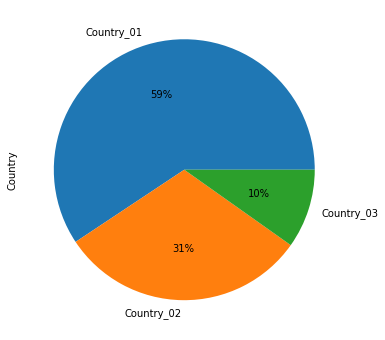

In [ ]:
print('--'*30); print('Value Counts for `Country` label'); print('--'*30)

total_row_cnt = Safety_df.shape[0]
country_01_cnt = Safety_df[Safety_df.Country == 'Country_01'].shape[0]
country_02_cnt = Safety_df[Safety_df.Country == 'Country_02'].shape[0]
country_03_cnt = Safety_df[Safety_df.Country == 'Country_03'].shape[0]

print(f'Country_01 count: {country_01_cnt} i.e. {round(country_01_cnt/total_row_cnt*100, 0)}%')
print(f'Country_02 count: {country_02_cnt} i.e. {round(country_02_cnt/total_row_cnt*100, 0)}%')
print(f'Country_03 count: {country_03_cnt} i.e. {round(country_03_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Distributon of `Country` label'); print('--'*30)
_ = Safety_df['Country'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['Country_01', 'Country_02', 'Country_03'], figsize = (10, 6))



1.  59% accidents occurred in Country_01
2.  31% accidents occurred in Country_02
3.  10% accidents occurred in Country_03


## Local

In [ ]:
local_cnt = np.round(Safety_df['Local'].value_counts(normalize=True) * 100)

hv.extension('bokeh')
hv.Bars(local_cnt).opts(title="Local Count", color="#8888ff", xlabel="Locals", ylabel="Percentage", yformatter='%d%%')\
                .opts(opts.Bars(width=700, height=300,tools=['hover'],show_grid=True))

Output hidden; open in https://colab.research.google.com to view.



*   Highest manufacturing plants are located in Local_03 city.
*   Highest manufacturing plants are located in Local_03 city.



## Industry Sector

In [ ]:
print('--'*30); print('Value Counts for `Industry Sector` label'); print('--'*30)

Mining_cnt = Safety_df[Safety_df['Industry Sector'] == 'Mining'].shape[0]
Metals_cnt = Safety_df[Safety_df['Industry Sector'] == 'Metals'].shape[0]
Others_cnt = Safety_df[Safety_df['Industry Sector'] == 'Others'].shape[0]

print(f'Mining count: {Mining_cnt} i.e. {round(Mining_cnt/total_row_cnt*100, 0)}%')
print(f'Metals count: {Metals_cnt} i.e. {round(Metals_cnt/total_row_cnt*100, 0)}%')
print(f'Others count: {Others_cnt} i.e. {round(Others_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Distributon of `Industry Sector` label'); print('--'*30)

sector_cnt = np.round(Safety_df['Industry Sector'].value_counts(normalize=True) * 100)
hv.extension('bokeh')

hv.Bars(sector_cnt).opts(title="Industry Sector Count", color="#8888ff", xlabel="Sectors", ylabel="Percentage", yformatter='%d%%')\
                .opts(opts.Bars(width=500, height=300,tools=['hover'],show_grid=True))\
                * hv.Text('Mining', 15, f"{int(sector_cnt.loc['Mining'])}%")\
                * hv.Text('Metals', 15, f"{int(sector_cnt.loc['Metals'])}%")\
                * hv.Text('Others', 15, f"{int(sector_cnt.loc['Others'])}%")
     

Output hidden; open in https://colab.research.google.com to view.



*   57% manufacturing plants belongs to Mining sector.
*   32% manufacturing plants belongs to Metals sector.
*   11% manufacturing plants belongs to Others sector.



## Accidents Levels

In [ ]:
print('--'*30); print('Value Counts for `Accident Level` label'); print('--'*40)

I_acc_cnt = Safety_df[Safety_df['Accident Level'] == 'I'].shape[0]
II_acc_cnt = Safety_df[Safety_df['Accident Level'] == 'II'].shape[0]
III_acc_cnt = Safety_df[Safety_df['Accident Level'] == 'III'].shape[0]
IV_acc_cnt = Safety_df[Safety_df['Accident Level'] == 'IV'].shape[0]
V_acc_cnt = Safety_df[Safety_df['Accident Level'] == 'V'].shape[0]
VI_acc_cnt = Safety_df[Safety_df['Accident Level'] == 'VI'].shape[0]

print(f'Accident Level - I count: {I_acc_cnt} i.e. {round(I_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - II count: {II_acc_cnt} i.e. {round(II_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - III count: {III_acc_cnt} i.e. {round(III_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - IV count: {IV_acc_cnt} i.e. {round(IV_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - V count: {V_acc_cnt} i.e. {round(V_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - VI count: {VI_acc_cnt} i.e. {round(VI_acc_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Value Counts for `Potential Accident Level'); print('--'*40)

I_pot_acc_cnt = Safety_df[Safety_df['Potential Accident Level'] == 'I'].shape[0]
II_pot_acc_cnt = Safety_df[Safety_df['Potential Accident Level'] == 'II'].shape[0]
III_pot_acc_cnt = Safety_df[Safety_df['Potential Accident Level'] == 'III'].shape[0]
IV_pot_acc_cnt = Safety_df[Safety_df['Potential Accident Level'] == 'IV'].shape[0]
V_pot_acc_cnt = Safety_df[Safety_df['Potential Accident Level'] == 'V'].shape[0]
VI_pot_acc_cnt = Safety_df[Safety_df['Potential Accident Level'] == 'VI'].shape[0]

print(f'Potential Accident Level - I count: {I_pot_acc_cnt} i.e. {round(I_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - II count: {II_pot_acc_cnt} i.e. {round(II_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - III count: {III_pot_acc_cnt} i.e. {round(III_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - IV count: {IV_pot_acc_cnt} i.e. {round(IV_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - V count: {V_pot_acc_cnt} i.e. {round(V_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - VI count: {VI_pot_acc_cnt} i.e. {round(VI_pot_acc_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Distributon of `Accident Level` & `Potential Accident Level` label'); print('--'*40)

ac_level_cnt = np.round(Safety_df['Accident Level'].value_counts(normalize=True) * 100)
pot_ac_level_cnt = np.round(Safety_df['Potential Accident Level'].value_counts(normalize=True) * 100, decimals=1)
ac_pot = pd.concat([ac_level_cnt, pot_ac_level_cnt], axis=1,sort=False).fillna(0).rename(columns={'Accident Level':'Accident', 'Potential Accident Level':'Potential'})
ac_pot = pd.melt(ac_pot.reset_index(), ['index']).rename(columns={'index':'Severity', 'variable':'Levels'})
hv.extension('bokeh')   

hv.Bars(ac_pot, ['Severity', 'Levels'], 'value').opts(opts.Bars(title="Accident Levels Count", width=700, height=300,tools=['hover'],\
                                                                show_grid=True,xrotation=45, ylabel="Percentage", yformatter='%d%%'))


Output hidden; open in https://colab.research.google.com to view.

## Gender

In [ ]:
print('--'*30); print('Value Counts for `Gender` label'); print('--'*30)

Male_cnt = Safety_df[Safety_df['Gender'] == 'Male'].shape[0]
Female_cnt = Safety_df[Safety_df['Gender'] == 'Female'].shape[0]

print(f'Male count: {Male_cnt} i.e. {round(Male_cnt/total_row_cnt*100, 0)}%')
print(f'Female count: {Female_cnt} i.e. {round(Female_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Distributon of `Gender` label'); print('--'*30)

gender_cnt = np.round(Safety_df['Gender'].value_counts(normalize=True) * 100)
hv.extension('bokeh')

hv.Bars(gender_cnt).opts(title="Gender Count", color="#8888ff", xlabel="Gender", ylabel="Percentage", yformatter='%d%%')\
                .opts(opts.Bars(width=500, height=300,tools=['hover'],show_grid=True))

Output hidden; open in https://colab.research.google.com to view.

## Employee type

In [ ]:
print('--'*30); print('Value Counts for `Employee type` label'); print('--'*30)

third_party_cnt = Safety_df[Safety_df['Employee_type'] == 'Third Party'].shape[0]
emp_cnt = Safety_df[Safety_df['Employee_type'] == 'Employee'].shape[0]
third_rem_cnt = Safety_df[Safety_df['Employee_type'] == 'Third Party (Remote)'].shape[0]

print(f'Third Party count: {third_party_cnt} i.e. {round(third_party_cnt/total_row_cnt*100, 0)}%')
print(f'Employee count: {emp_cnt} i.e. {round(emp_cnt/total_row_cnt*100, 0)}%')
print(f'Third Party (Remote) count: {third_rem_cnt} i.e. {round(third_rem_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Distributon of `Employee type` label'); print('--'*30)

emp_type_cnt = np.round(Safety_df['Employee_type'].value_counts(normalize=True) * 100)
hv.extension('bokeh')     

hv.Bars(emp_type_cnt).opts(title="Employee type Count", color="#8888ff", xlabel="Employee Type", ylabel="Percentage", yformatter='%d%%')\
                .opts(opts.Bars(width=500, height=300,tools=['hover'],show_grid=True))
              

Output hidden; open in https://colab.research.google.com to view.

## Critical Risk

In [ ]:
cr_risk_cnt = np.round(Safety_df['Critical Risk'].value_counts(normalize=True) * 100)
hv.extension('bokeh')     
hv.Bars(cr_risk_cnt[::-1]).opts(title="Critical Risk Count", color="#8888ff", xlabel="Critical Risks", ylabel="Percentage", xformatter='%d%%')\
                .opts(opts.Bars(width=600, height=600,tools=['hover'],show_grid=True,invert_axes=True))

Output hidden; open in https://colab.research.google.com to view.



*   Because most part of the Critical Risks are classified as 'Others', it is thought that there are too many risks to classify precisely.
*   And it is also thought that it takes so much time to analyze risks and reasons why the accidents occur.



## Calender

In [ ]:
hv.extension('bokeh')     
year_cnt = np.round(Safety_df['Year'].value_counts(normalize=True,sort=False) * 100)
year = hv.Bars(year_cnt).opts(title="Year Count", color="yellow", xlabel="Years")

month_cnt = np.round(Safety_df['Month'].value_counts(normalize=True,sort=False) * 100)
month = hv.Bars(month_cnt).opts(title="Month Count", color="#8888ff", xlabel="Months") * hv.Curve(month_cnt).opts(color='red', line_width=3)

(year + month).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True, ylabel="Percentage", yformatter='%d%%')).cols(2)

Output hidden; open in https://colab.research.google.com to view.



*   Accidents are recorded from 1st Jan 2016 to 9th July 2017 in every month, there are high number of accidents in 2016 and less in 2017.
*   Number of accidents are high in beginning of the year and it keeps decreasing later.



In [ ]:
day_cnt = np.round(Safety_df['Day'].value_counts(normalize=True,sort=False) * 100)
hv.extension('bokeh')   
hv.Bars(day_cnt).opts(title="Day Count", color="#8888ff", xlabel="Days") * hv.Curve(day_cnt).opts(width=500, height=300, color='red', line_width=3)

Output hidden; open in https://colab.research.google.com to view.


*   Number of accidents are very high in particular days like 4, 8 and 16 in every month.



# Bivariate Analysis and Hypothesis testing


*    Industry Sector by Countries - Is the distribution of industry sector different significantly in differ countries or not?
*   Employee type by Gender - Is the distribution of employee type differ significantly in different genders?
*   Industry Sector by Gender - Is the distribution of industry sector differ significantly in different genders?
*   Accident Levels by Gender - Is the distribution of accident levels and potential accident levels differ significantly in different genders?
*   Accident Levels by Employee type - Is the distribution of accident levels and potential accident levels differ significantly in different employee types?
*   Accident Levels by Month - Is the distribution of accident levels and potential accident levels differ significantly in different months?
*   Accident Levels by Weekday - Is the distribution of accident levels and potential accident levels differ significantly in different weekday?
*   Accident Levels by Seasons - Is the distribution of accident levels and potential accident levels differ significantly in different seasons?









#### we will take each assumption for hypothesis and testing it to decide whether it is reject or accept the null hypothesis based on significance level & Z-test, P-value. Moveforward checking the correlation between features.

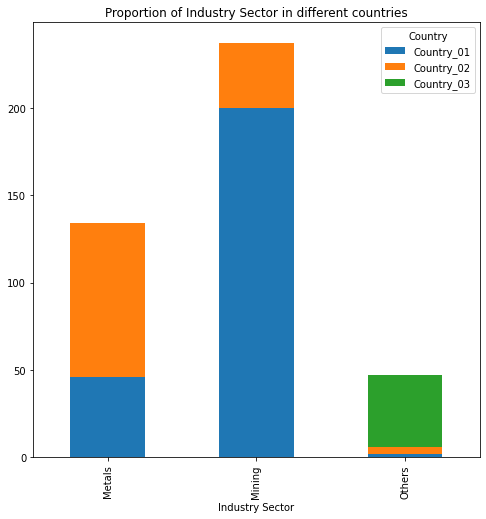

In [ ]:
# Check the proportion of Industry sector in different countries
indsec_cntry_table = pd.crosstab(index = Safety_df['Industry Sector'], columns = Safety_df['Country'])
indsec_cntry_table.plot(kind = 'bar', figsize=(8,8), stacked = True)
plt.title("Proportion of Industry Sector in different countries")
plt.show()

1. State the H0 and Ha
Ho = The proportions of industry sector is not differ in different countries
Ha = The proportions of industry sector is differ in different countries
2. Decide the significance level: alpha = 0.05
3. Identify the test-statistic: Z-test of proportions
4. Calculate the p_value using test-statistic

In [ ]:
mining_country1 = Safety_df[Safety_df['Industry Sector'] == 'Mining']['Country'].value_counts()[0]
mining_country2 = Safety_df[Safety_df['Industry Sector'] == 'Mining']['Country'].value_counts()[1]

metals_country1 = Safety_df[Safety_df['Industry Sector'] == 'Metals']['Country'].value_counts()[1]
metals_country2 = Safety_df[Safety_df['Industry Sector'] == 'Metals']['Country'].value_counts()[0]

others_country1 = Safety_df[Safety_df['Industry Sector'] == 'Others']['Country'].value_counts()[2]
others_country2 = Safety_df[Safety_df['Industry Sector'] == 'Others']['Country'].value_counts()[1]
others_country3 = Safety_df[Safety_df['Industry Sector'] == 'Others']['Country'].value_counts()[0]
import pandas.util.testing as tm

print([mining_country1, metals_country1, others_country1], [country_01_cnt])
print(f'Proportions of mining, metals, others in country_01 = {round(200/248,2)}%, {round(46/248,2)}%, {round(2/248,2)}% respectively')

from statsmodels.stats.proportion import proportions_ztest

# Z-test proportions: More than 2 samples not implemented yet, hence I am passing two elements
t_statistic, p_value = proportions_ztest([mining_country1, metals_country1], [country_01_cnt])

print("Mining and Metals t_statistic", t_statistic)
print("Mining and Metals p_value", p_value)

t_statistic, p_value = proportions_ztest([mining_country1, others_country1], [country_01_cnt])

print("Mining and Others t_statistic", t_statistic)
print("Mining and Others p_value", p_value)

reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

[200, 46, 2] [248]
Proportions of mining, metals, others in country_01 = 0.81%, 0.19%, 0.01% respectively
Mining and Metals t_statistic 13.830057992106923
Mining and Metals p_value 1.6788511371823555e-43
Mining and Others t_statistic 18.094920466702863
Mining and Others p_value 3.494480338628687e-73
reject null? : True


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  # Remove the CWD from sys.path while we load stuff.


Hence we reject Null Hypothesis, we have enough (95%) evidence to prove that, the mining sector in country 1 is differ from metals sector)

Hence we reject Null Hypothesis, we have enough (95%) evidence to prove that, the mining sector in country 1 is differ from others sector)

In [ ]:
f = lambda x : np.round(x/x.sum() * 100)
em_gen = Safety_df.groupby(['Gender','Employee_type'])['Employee_type'].count().unstack().apply(f, axis=1)
hv.extension('bokeh')
hv.Bars(pd.melt(em_gen.reset_index(), ['Gender']), ['Gender','Employee_type'], 'value').opts(opts.Bars(title="Employee type by Gender Count", width=800, height=300,tools=['hover'],\
                                                                show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%'))

Output hidden; open in https://colab.research.google.com to view.

Proportion of third party employees in each gender is equal.
Proportion of third party(remote) employees in each gender is not equal.
Proportion of own employees in each gender is not equal. But let's check is that difference is statistically significant?

1. State the H0 and Ha
Ho = The proportions of own employees in each gender is equal.
Ha = The proportions of own employees in each gender is not equal.
2. Decide the significance level: alpha = 0.05
3. Identify the test-statistic: Z-test of proportions
4. Calculate the p_value using test-statistic

In [ ]:
male_emp = Safety_df[Safety_df['Employee_type'] == 'Employee'].Gender.value_counts()[0]
female_emp = Safety_df[Safety_df['Employee_type'] == 'Employee'].Gender.value_counts()[1]

print([male_emp, female_emp], [Male_cnt, Female_cnt])
print(f'Proportion of own employee types in male, female = {round(170/396,2)}%, {round(8/22,2)}% respectively')

t_statistic, p_value = proportions_ztest([male_emp, female_emp], [Male_cnt, Female_cnt])

print("t_statistic", t_statistic)
print("p_value", p_value)

reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

[170, 8] [396, 22]
Proportion of own employee types in male, female = 0.43%, 0.36% respectively
t_statistic 0.6061911815982839
p_value 0.5443878078917722
reject null? : False


Hence we fail to reject Null Hypothesis, we have enough (95%) evidence to prove that, the proportion of own employees in each gender is equal

In [ ]:
f = lambda x : np.round(x/x.sum() * 100)
em_gen = Safety_df.groupby(['Gender','Industry Sector'])['Industry Sector'].count().unstack().apply(f, axis=1)
hv.extension('bokeh')
hv.Bars(pd.melt(em_gen.reset_index(), ['Gender']), ['Gender','Industry Sector'], 'value').opts(opts.Bars(title="Industry Sector by Gender Count", width=800, height=300,tools=['hover'],\
                                                                show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%'))

Output hidden; open in https://colab.research.google.com to view.

Proportion of Metals sector employees in each gender is not equal.
Proportion of Mining sector employees in each gender is not equal.
Proportion of Others sector employees in each gender is not equal.

In [ ]:
f = lambda x : np.round(x/x.sum() * 100)
hv.extension('bokeh')
ac_gen = Safety_df.groupby(['Gender','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1)
ac = hv.Bars(pd.melt(ac_gen.reset_index(), ['Gender']), ['Gender','Accident Level'], 'value').opts(opts.Bars(title="Accident Level by Gender Count"))

pot_ac_gen = Safety_df.groupby(['Gender','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=1)
pot_ac = hv.Bars(pd.melt(pot_ac_gen.reset_index(), ['Gender']), ['Gender','Potential Accident Level'], 'value').opts(opts.Bars(title="Potential Accident Level by Gender Count"))

(ac + pot_ac).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%'))

Output hidden; open in https://colab.research.google.com to view.

Proportion of accident levels in each gender is not equal and males have a higher accident levels than females.
There are many low risks at general accident level, but many high risks at potential accident level.

In [ ]:
f = lambda x : np.round(x/x.sum() * 100)
hv.extension('bokeh')
ac_em = Safety_df.groupby(['Employee_type','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1)
ac = hv.Bars(pd.melt(ac_em.reset_index(), ['Employee_type']), ['Employee_type','Accident Level'], 'value').opts(opts.Bars(title="Accident Level by Employee type Count"))

pot_ac_em = Safety_df.groupby(['Employee_type','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=1)
pot_ac = hv.Bars(pd.melt(pot_ac_em.reset_index(), ['Employee_type']), ['Employee_type','Potential Accident Level'], 'value').opts(opts.Bars(title="Potential Accident Level by Employee type Count"))

(ac + pot_ac).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%',fontsize={'title':9}))

Output hidden; open in https://colab.research.google.com to view.

For both accident levels, the incidence of Employee is higher at low accident levels, but the incidence of Third parties seems to be slightly higher at high accident levels.

In [ ]:
f = lambda x : np.round(x/x.sum() * 100)
hv.extension('bokeh')
ac_mo = Safety_df.groupby(['Month','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1).fillna(0)
ac = hv.Curve(ac_mo['I'], label='I') * hv.Curve(ac_mo['II'], label='II') * hv.Curve(ac_mo['III'], label='III') * hv.Curve(ac_mo['IV'], label='IV') * hv.Curve(ac_mo['V'], label='V')\
        .opts(opts.Curve(title="Accident Level by Month Count"))

pot_ac_mo = Safety_df.groupby(['Month','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=1).fillna(0)
pot_ac = hv.Curve(pot_ac_mo['I'], label='I') * hv.Curve(pot_ac_mo['II'], label='II') * hv.Curve(pot_ac_mo['III'], label='III') * hv.Curve(pot_ac_mo['IV'], label='IV')\
        * hv.Curve(pot_ac_mo['V'], label='V') * hv.Curve(pot_ac_mo['VI'], label='VI').opts(opts.Curve(title="Potential Accident Level by Month Count"))
(ac+pot_ac).opts(opts.Curve(width=800, height=300,tools=['hover'],show_grid=True, ylabel="Percentage", yformatter='%d%%')).cols(1)       

Output hidden; open in https://colab.research.google.com to view.

Both of the two accident level have the tendency that non-severe levels decreased throughout the year, but severe levels did not changed much, and some of these levels increased slightly in the second half of the year.

In [ ]:
# Summary statistics
Safety_df.drop(columns='Description').describe(exclude=[np.number]).T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,count,unique,top,freq,first,last
Date,418,287,2017-02-08 00:00:00,6,2016-01-01,2017-07-09
Country,418,3,Country_01,248,NaT,NaT
Local,418,12,Local_03,89,NaT,NaT
Industry Sector,418,3,Mining,237,NaT,NaT
Accident Level,418,5,I,309,NaT,NaT
Potential Accident Level,418,6,IV,141,NaT,NaT
Gender,418,2,Male,396,NaT,NaT
Employee_type,418,3,Third Party,185,NaT,NaT
Critical Risk,418,33,Others,229,NaT,NaT
Weekday,418,7,Thursday,76,NaT,NaT


In [ ]:
# check for correlation
Safety_df.corr()

,Year,Month,Day,WeekofYear,Is_Holiday
Year,1.000000,-0.416621,-0.001982,-0.418798,-0.041169
Month,-0.416621,1.000000,0.002133,0.964295,-0.082047
Day,-0.001982,0.002133,1.000000,0.060982,-0.028673
WeekofYear,-0.418798,0.964295,0.060982,1.000000,-0.028368
Is_Holiday,-0.041169,-0.082047,-0.028673,-0.028368,1.000000


WeekofYear featuer is having very high positive correlation with Month feature.

# EDA Summary:
### Local

Highest manufacturing plants are located in Local_03 city and lowest in Local_09 city.
### Country

Percentage(%) of accidents occurred in respective countries: 59% in Country_01, 31% in Country_02 and 10% in Country_03.
### Industry Sector

Percentage(%) of manufacturing plants belongs to respective sectors: 57% to Mining sector, 32% to Metals sector and 11% to Others sector.
### Country + Industry Sector

Metals and Mining industry sector plants are not available in Country_03.
Distribution of industry sector differ significantly in each country.
### Accident Levels

The number of accidents decreases as the Accident Level increases and increases as the Potential Accident Level increases.
### Gender

There are more men working in this industry as compared to women.
### Employee type

44% Third party empoyees, 43% own empoyees and 13% Third party(Remote) empoyees working in this industry.
### Gender + Employee type

Proportion of third party employees in each gender is equal, third party(remote) employees in each gender is not equal and own employees in each gender is not equal.
### Gender + Industry Sector

Proportion of Metals, Mining and Others sector employees in each gender is not equal
### Gender + Accident Levels

Males have a higher accident levels than females.
There are many low risks at general accident level, but many high risks at potential accident level.
### Accident Levels + Employee type

For both accident levels, the incidence of Employee is higher at low accident levels, but the incidence of Third parties seems to be slightly higher at high accident levels.
### Accident Levels + Calendar

Accidents are recorded from 1st Jan 2016 to 9th July 2017 in every month, there are high number of accidents in 2016 and less in 2017.
Number of accidents are high in beginning of the year and it keeps decreasing later.
Number of accidents are very high in particular days like 4, 8 and 16 in every month.
Number of accidents increased during the middle of the week and declined since the middle of th week.

Both of the two accident level have the tendency that non-severe levels decreased throughout the year, but severe levels did not changed much, and some of these levels increased slightly in the second half of the year.

Both of the two accident level is thought that non-severe levels decreased in the first and the last of the week, but severe levels did not changed much.
### Critical Risk

Most of the critical risks are classified as Others.

In [ ]:
Safety_df

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee_type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season,Is_Holiday
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer,1
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,Summer,0
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,Summer,0
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1,Summer,0
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1,Summer,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2017-07-04,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w...",2017,7,4,Tuesday,27,Winter,0
421,2017-07-04,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...,2017,7,4,Tuesday,27,Winter,0
422,2017-07-05,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...,2017,7,5,Wednesday,27,Winter,0
423,2017-07-06,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...,2017,7,6,Thursday,27,Winter,0


# NLP Preprocessing

In [ ]:
# To explore the Description of accident to identity the opportunity for preprocessing.
rands = random.sample(range(1, Safety_df.shape[0]), 5)
descriptions, accident_levels = list(Safety_df.loc[rands, 'Description']), list(Safety_df.loc[rands, 'Accident Level'])

_ = [print(f'Description: {description}\naccident_level: {acclevel}\n') for description, acclevel in zip(descriptions, accident_levels)]

Description: The employees Márcio and Sérgio performed the pump pipe clearing activity FZ1.031.4 and during the removal of the suction spool flange bolts, there was projection of pulp over them causing injuries.
accident_level: II

Description: When the mechanical technician proceeded to perform the maintenance of motor supports of a tipper, he decided to bring a wooden block, for which he moved to the temporary storage of materials - located at 10 m. of the tipper - in circumstances in which he sought the cue; the camera of a tire burst suddenly (it was on the right and 2 m. of the involved); the thunderous sound affected the right ear of the worker. The tire that exploded has 110 psi of pressure approximately, at the time of the event they were stacked 3 pneumatic, the second was the one that exploded (presented cut - place where the energy was released). The tire that was in the upper part was not projected. The tires were left by the previous guard (night shift), the storage area d

In [ ]:
# chekcing the characters and words formation & length of description.
indexes = list(Safety_df.loc[Safety_df['Description'].str.len() > 100, 'Description'].index)
rands = random.sample(indexes, 5)
descriptions, accident_levels = list(Safety_df.loc[rands, 'Description']), list(Safety_df.loc[rands, 'Accident Level'])

_ = [print(f'Description: {description}\naccident_level: {acclevel}\n') for description, acclevel in zip(descriptions, accident_levels)]


Description: Employee reports that he was monitoring the existence of a borehole of a tubing in the thermal recovery boiler of the Ustulation area, through the side window, when he was struck by projection of heated air that reached his face and right forearm.
accident_level: II

Description: When conducting inspection to evaluate activity to be carried out in the pump house of the Ustulation steam station, it was struck by sulfuric acid spills from a line located above the house of thermal recovery boiler pumps.
accident_level: I

Description: In section 75 in row 12 Cell 36, the worker performs anode lifting to correct short circuit, using the auxiliary hoist and nylon sling, at which time the sling is released from the anode and hits the back of the right hand causing it the injury. Worker is seen in the Medical and transferred to a clinic for external evaluation.
accident_level: IV

Description: In the area of ​​equipment inspection, while the staff of the Atenuz EE, trying to remo

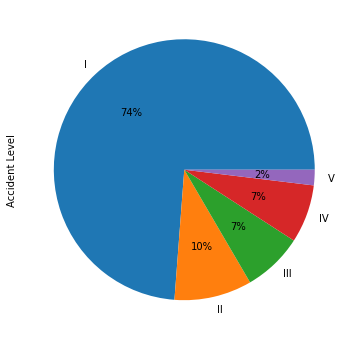

In [ ]:
plot_description= Safety_df.loc[indexes, 'Accident Level'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['I', 'II', 'III', 'IV', 'V'], figsize = (10, 6))

Description: When observing the pulp overflow of the overflow reception drawer of the thickener, the filter operator approaches to verify the operation of the C7-26 pump, making sure that it was stopped. So press the keypad to start the pump and not getting the start, proceeds to remove the guard and manipulates the motor - pump transmission strips, being left hand imprisoned between the pulley of motor and transmission belt
pot_accident_level: V

Description: After the welder completed the welding work to reinforce the forms in the deepening, he walked towards the distant truck at about 40 mt, at which point the welder stepped on a fragment of rock of 5 cm x 10cm x 5cm approx. which generates that the foot flexes and generates the injury in the worker.
pot_accident_level: II

Description: During the activity of changing conveyor belt 11B feeding the primary mill No. 2; the mechanic entered the discharge chute (0.75 x 0.75 x 0.80 m.) to clean the material, at which time the automatic s

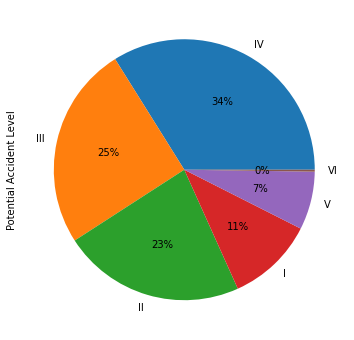

In [ ]:
indexes = list(Safety_df.loc[Safety_df['Description'].str.len() > 100, 'Description'].index)
rands = random.sample(indexes, 5)
descriptions, pot_accident_levels = list(Safety_df.loc[rands, 'Description']), list(Safety_df.loc[rands, 'Potential Accident Level'])

potential_plot= [print(f'Description: {descriptin}\npot_accident_level: {pot_acclevel}\n') for descriptin, pot_acclevel in zip(descriptions, pot_accident_levels)]

potential_plot = Safety_df.loc[indexes, 'Potential Accident Level'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['IV', 'III', 'II', 'I', 'V', 'VI'], figsize = (10, 6))

#### Most of the data where we are looking for scope of preprocessing techiques related to lemmatization and remove punchmarks since many of letters are lower case & special characters might be remove.

In [ ]:
import nltk; nltk.download('wordnet'); nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

nltk.download('averaged_perceptron_tagger')

appos = {"ain't": "am not", "aren't": "are not", "can't": "cannot", 
         "can't've": "cannot have", "'cause": "because", 
         "could've": "could have", "couldn't": "could not", 
         "couldn't've": "could not have", "didn't": "did not", 
         "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
         "hadn't've": "had not have", "hasn't": "has not", 
         "haven't": "have not", "he'd": "he would", "he'd've": "he would have", 
         "he'll": "he will", "he'll've": "he will have", 
         "he's": "he is", "how'd": "how did", 
         "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
         "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
         "I'll've": "I will have", "I'm": "I am", "I've": "I have", 
         "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
         "it'll": "it will", "it'll've": "it will have", "it's": "it is", 
         "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
         "might've": "might have", "mightn't": "might not", 
         "mightn't've": "might not have", "must've": "must have", 
         "mustn't": "must not", "mustn't've": "must not have", 
         "needn't": "need not", "needn't've": "need not have",
         "o'clock": "of the clock", "oughtn't": "ought not", 
         "oughtn't've": "ought not have", "shan't": "shall not", 
         "sha'n't": "shall not", "shan't've": "shall not have", 
         "she'd": "she would", "she'd've": "she would have", 
         "she'll": "she will", "she'll've": "she will have",
         "she's": "she is", "should've": "should have", 
         "shouldn't": "should not", "shouldn't've": "should not have", 
         "so've": "so have", "so's": "so is", 
         "that'd": "that had", "that'd've": "that would have", 
         "that's": "that that is", "there'd": "there would", 
         "there'd've": "there would have", "there's": "there is", 
         "they'd": "they would", "they'd've": "they would have", 
         "they'll": "they will", "they'll've": "they will have", 
         "they're": "they are", "they've": "they have", 
         "to've": "to have", "wasn't": "was not", "we'd": "we would", 
         "we'd've": "we would have", "we'll": "we will", 
         "we'll've": "we will have", "we're": "we are", 
         "we've": "we have", "weren't": "were not", 
         "what'll": "what will", "what'll've": "what will have", 
         "what're": "what are", "what's": "what is", 
         "what've": "what have", "when's": "when is", 
         "when've": "when have", "where'd": "where did", 
         "where's": "where is", "where've": "where have", 
         "who'll": "who will", "who'll've": "who will have", 
         "who's": "who is", "who've": "who have", 
         "why's": "why is", "why've": "why have", "will've": "will have", 
         "won't": "will not", "won't've": "will not have",
         "would've": "would have", "wouldn't": "would not", 
         "wouldn't've": "would not have", "y'all": "you all", 
         "y'all'd": "you all would", "y'all'd've": "you all would have", 
         "y'all're": "you all are", "y'all've": "you all have", 
         "you'd": "you would", "you'd've": "you would have",
         "you'll": "you will", "you'll've": "you will have", 
         "you're": "you are", "you've": "you have"}

# Helper function to replace appos
def replace_words(description):
    cleaned_description = []
    for word in str(description).split():
        if word.lower() in appos.keys():
            cleaned_description.append(appos[word.lower()])
        else:
            cleaned_description.append(word)
    return ' '.join(cleaned_description)

# Helper function to remove punctuations
# Reference: https://www.programiz.com/python-programming/methods/string/translate
PUNCT_TO_REMOVE = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~' #string.punctuation
def remove_punctuation(text):
    """function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

# Helper function to lemmatize
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
  return ''.join([lemmatizer.lemmatize(word) for word in text])

# Helper function to remove stopwords
stoplist = set(stopwords.words('english'))
stoplist.update(('cm', 'kg', 'mr', 'wa' ,'nv', 'ore', 'da', 'pm', 'am', 'cx'))
stoplist.remove('not')
def remove_stopwords(text):
    """function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in stoplist])

# Helper function for wordcloud
# Reference: https://www.kaggle.com/aashita/word-clouds-of-various-shapes
def plot_wordcloud(text, mask = None, max_words = 500, max_font_size = 40, 
                   figure_size = (12, 6), title = None, title_size = 15):
    wordcloud = WordCloud(background_color = 'white', max_words = max_words,
                          random_state = 42, width = 350, height = 150, 
                          mask = mask, stopwords = stoplist, collocations = False)
    wordcloud.generate(str(text))
    
    plt.figure(figsize = figure_size)
    plt.imshow(wordcloud, interpolation = 'bilinear');
    plt.title(title, fontdict = {'size': title_size, 'color': 'black', 
                               'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

# Second helper function for lemmatizing
lemmatizer = WordNetLemmatizer()
def lem(text):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
    return(' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(text.split())]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
## Import libraries for NLP preprocessing
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.corpus import names, stopwords, words
stop_words = stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer
import re, random
from nltk import word_tokenize, sent_tokenize, pos_tag
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

import os
print(os.getcwd())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/content


In [ ]:
Safety_df['Cleaned_Description'] = Safety_df['Description'].apply(lambda x : x.lower())
Safety_df['Cleaned_Description'] = Safety_df['Cleaned_Description'].apply(lambda x : replace_words(x))
Safety_df['Cleaned_Description'] = Safety_df['Cleaned_Description'].apply(lambda x: remove_punctuation(x))
Safety_df['Cleaned_Description'] = Safety_df['Cleaned_Description'].apply(lambda x: lemmatize(x))
Safety_df['Cleaned_Description'] = Safety_df['Cleaned_Description'].apply(lambda x: re.sub(' +', ' ', x))
Safety_df['Cleaned_Description'] = Safety_df['Cleaned_Description'].apply(lambda x: remove_stopwords(x))

In [ ]:
Safety_df['Cleaned_Description']

0      removing drill rod jumbo 08 maintenance superv...
1      activation sodium sulphide pump piping uncoupl...
2      substation milpo located level 170 collaborato...
3      945 approximately 1880 cx695 ob7 personnel beg...
4      approximately 1145 circumstances mechanics ant...
                             ...                        
420    approximately 500 approximately lifting kelly ...
421    collaborator moved infrastructure office julio...
422    environmental monitoring activity area employe...
423    employee performed activity stripping cathodes...
424    1000 assistant cleaned floor module e central ...
Name: Cleaned_Description, Length: 418, dtype: object

In [ ]:
## Let's Check the length of each line
Safety_df['line_length'] = Safety_df['Cleaned_Description'].str.len()

print('Minimum line length: {}'.format(Safety_df['line_length'].min()))
print('Maximum line length: {}'.format(Safety_df['line_length'].max()))
print('Line with maximum length: {}'.format(Safety_df[Safety_df['line_length'] == Safety_df['line_length'].max()]['Cleaned_Description'].values[0]))

Minimum line length: 64
Maximum line length: 680
Line with maximum length: level 3490 gallery 239 holding activity bolter equipment 24 operator performs drilling first hole support right gable 7footdeep drill end drill rod breaks leaving threads inside drilling machines shank operator assistant decide make two empty percussion attempts free threads shank without success third attempt assistant enters 38 corrugated iron central hole rest bar embedded shank generate pressure moment operator activates percussion generates movement shank hits palm victims left hand generating described injury worker wearing safety gloves time accident end corrugated iron contact left hand shaped like cane worker time accident positioned roof supported mesh split set


In [ ]:
Safety_df.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee_type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season,Is_Holiday,Cleaned_Description,line_length
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer,1,removing drill rod jumbo 08 maintenance superv...,283
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,Summer,0,activation sodium sulphide pump piping uncoupl...,208
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,Summer,0,substation milpo located level 170 collaborato...,204
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1,Summer,0,945 approximately 1880 cx695 ob7 personnel beg...,360
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1,Summer,0,approximately 1145 circumstances mechanics ant...,322


In [ ]:
## Let's Check words of each line
Safety_df['nb_words'] = Safety_df['Cleaned_Description'].apply(lambda x: len(x.split(' ')))
print('Minimum number of words: {}'.format(Safety_df['nb_words'].min()))
print('Maximum number of words: {}'.format(Safety_df['nb_words'].max()))
print('Line with maximum number of words: {}'.format(Safety_df[Safety_df['nb_words'] == Safety_df['nb_words'].max()]['Cleaned_Description'].values[0]))

Minimum number of words: 10
Maximum number of words: 98
Line with maximum number of words: performing sleeve removal maneuver hole 600 meters deep general silva pressed one side locking nut rods together jack holds entire weight rods maneuver locking procedure not effective weight rods secured steel wire rope probe winch moment driller pedro released brake winch inefficacy locking done one side chestnut without aid monkey caused sliding rods auxiliary prepared manual unlocking rods holding faucet key firmly probe tower composition shifted stems slid hands shifted downward causing left hand strike base probe tower structure causing cuts 4th 5th quirodactyl employee taken hospital went medical care wound sutured 16 stitches removed 10 days activities


In [ ]:
Safety_df.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee_type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season,Is_Holiday,Cleaned_Description,line_length,nb_words
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer,1,removing drill rod jumbo 08 maintenance superv...,283,38
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,Summer,0,activation sodium sulphide pump piping uncoupl...,208,28
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,Summer,0,substation milpo located level 170 collaborato...,204,30
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1,Summer,0,945 approximately 1880 cx695 ob7 personnel beg...,360,49
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1,Summer,0,approximately 1145 circumstances mechanics ant...,322,45


In [ ]:
Safety_df['nb_words'].describe().round(0).astype(int)

count    418
mean      34
std       16
min       10
25%       21
50%       31
75%       43
max       98
Name: nb_words, dtype: int64

### Preproceesing summary
*   74% of data where accident description > 100 is captured in low accident level.
*   34% of data where accident description > 100 is captured in high medium potential accident level.
*   25% of data where accident description > 100 is captured in medium potential accident level.
*   23% of data where accident description > 100 is captured in low potential accident level.

Few of the NLP pre-processing steps taken before applying model on the data
*   Converting to lower case, avoid any capital cases
*   Converting apostrophe to the standard lexicons
*   Removing punctuations
*   Lemmatization
*   Removing stop words
*   List item

After pre-processing steps:

Minimum line length: 64
Maximum line length: 672
Minimum number of words: 10
Maximum number of words: 98

In [ ]:
## Now we have preprocessed "Cleaned_Description" text format data - our goal is model has to predict safety risk as per the incident description.
## Lets apply Embeddings(Word2Vec,Glove Word,Sentence to vector,TFIDF)

In [ ]:
from gensim.models import Word2Vec
# define training data
sentences = Safety_df['Cleaned_Description']

# train model
model = Word2Vec(sentences,min_count=1)

# summarize the loaded model
print(model)

# summarize vocabulary
words = list(model.wv.index2word)
print(words)

# save model
model.save('model.bin')

# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=48, size=100, alpha=0.025)
[' ', 'e', 'i', 't', 'r', 'a', 'n', 'o', 's', 'l', 'c', 'd', 'p', 'm', 'g', 'u', 'h', 'f', 'b', 'y', 'v', 'k', 'w', '0', '1', 'x', 'j', '2', '5', '4', '3', 'q', '8', '7', '6', 'z', '9', '\u200b', '°', 'á', 'é', 'ã', 'ó', 'â', 'í', '¼', 'ô', 'ú']
Word2Vec(vocab=48, size=100, alpha=0.025)


In [ ]:
embeddings_index = {}
EMBEDDING_FILE = '/content/drive/MyDrive/Colab Notebooks/NEURAL NETWORKS/NLP/Capstone_project/glove.6B.200d.txt'
f = open(EMBEDDING_FILE)
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

400000it [00:22, 17576.80it/s]

Found 400000 word vectors.


In [ ]:
# this function creates a normalized vector for the whole sentence
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

# create sentence GLOVE embeddings vectors using the above function for training and validation set
ind_glove_df = [sent2vec(x) for x in tqdm(Safety_df['Cleaned_Description'])]

100%|██████████| 418/418 [00:00<00:00, 2212.41it/s]


In [ ]:
ind_glove_df[0]

array([ 1.39856245e-03,  8.99862126e-02,  1.08799164e-03, -3.09016760e-02,
        6.19197078e-03,  6.87033385e-02, -1.02347635e-01, -2.87667587e-02,
       -6.25691786e-02,  4.17288505e-02, -1.61288977e-02,  1.33184874e-02,
        1.12336598e-01,  1.67398853e-03,  8.71078447e-02, -1.93325020e-02,
       -3.66557874e-02, -2.86911987e-02,  7.09104389e-02,  8.07439629e-03,
       -4.30122279e-02,  6.14812076e-01,  9.06249657e-02,  1.87851384e-03,
        3.43448929e-02,  3.48158218e-02, -3.08507830e-02,  2.58244704e-02,
       -3.18089649e-02, -6.93444610e-02,  5.13918102e-02, -4.53802906e-02,
        1.09138573e-02, -1.77216530e-02,  1.88153088e-02, -3.13805038e-04,
       -8.93176496e-02, -6.43905252e-02, -7.05620348e-02,  4.99016382e-02,
        6.68967739e-02,  3.37204821e-02, -1.01575870e-02,  6.47136495e-02,
        3.32460664e-02,  6.59773797e-02,  4.91438136e-02,  2.39142426e-03,
        4.29478846e-02,  7.00706914e-02,  3.60498391e-02,  1.07721733e-02,
       -5.63761368e-02, -

In [ ]:
ind_tfidf_df = pd.DataFrame()
for i in [1,2,3]:
    vec_tfidf = TfidfVectorizer(max_features=10, norm='l2', stop_words='english', lowercase=True, use_idf=True, ngram_range=(i,i))
    X = vec_tfidf.fit_transform(Safety_df['Cleaned_Description']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names()])
    ind_tfidf_df = pd.concat([ind_tfidf_df.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)

ind_tfidf_df.head(3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,TFIDF_activity,TFIDF_area,TFIDF_causing,TFIDF_employee,TFIDF_hand,TFIDF_injury,TFIDF_left,TFIDF_operator,TFIDF_right,TFIDF_time,TFIDF_causing injury,TFIDF_described injury,TFIDF_employee reports,TFIDF_finger left,TFIDF_injury described,TFIDF_left foot,TFIDF_left hand,TFIDF_medical center,TFIDF_right hand,TFIDF_time accident,TFIDF_causing injury described,TFIDF_described time accident,TFIDF_finger left hand,TFIDF_finger right hand,TFIDF_generating described injury,TFIDF_hand causing injury,TFIDF_injury time accident,TFIDF_left hand causing,TFIDF_right hand causing,TFIDF_time accident employee
0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.55361,0.383117,0.0,0.413742,0.460892,0.403897,0.0,0.0,0.0,0.580478,0.0,0.0,0.0,0.0,0.814276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Safety_df['Employee_type'] = Safety_df['Employee_type'].str.replace(' ', '_')
Safety_df['Employee_type'].value_counts()

Third_Party             185
Employee                178
Third_Party_(Remote)     55
Name: Employee_type, dtype: int64

In [ ]:
Safety_df['Critical Risk'] = Safety_df['Critical Risk'].str.replace('\n', '').str.replace(' ', '_')
Safety_df['Critical Risk'].value_counts().head()

Others                 229
Pressed                 24
Manual_Tools            20
Chemical_substances     17
Cut                     14
Name: Critical Risk, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Create Industry DataFrame
ind_featenc_df = pd.DataFrame()

# Label encoding
Safety_df['Season'] = Safety_df['Season'].replace('Summer', 'aSummer').replace('Autumn', 'bAutumn').replace('Winter', 'cWinter').replace('Spring', 'dSpring')
ind_featenc_df['Season'] = LabelEncoder().fit_transform(Safety_df['Season']).astype(np.int8)

Safety_df['Weekday'] = Safety_df['Weekday'].replace('Monday', 'aMonday').replace('Tuesday', 'bTuesday').replace('Wednesday', 'cWednesday').replace('Thursday', 'dThursday').replace('Friday', 'eFriday').replace('Saturday', 'fSaturday').replace('Sunday', 'gSunday')
ind_featenc_df['Weekday'] = LabelEncoder().fit_transform(Safety_df['Weekday']).astype(np.int8)

ind_featenc_df['Accident Level'] = LabelEncoder().fit_transform(Safety_df['Accident Level']).astype(np.int8)
ind_featenc_df['Potential Accident Level'] = LabelEncoder().fit_transform(Safety_df['Potential Accident Level']).astype(np.int8)

In [ ]:
from keras.utils import np_utils

In [ ]:
#convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(ind_featenc_df['Accident Level'])
dummy_y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# Dummy variables encoding
Country_dummies = pd.get_dummies(Safety_df['Country'], columns=["Country"], drop_first=True)
Local_dummies = pd.get_dummies(Safety_df['Local'], columns=["Local"], drop_first=True)
Gender_dummies = pd.get_dummies(Safety_df['Gender'], columns=["Gender"], drop_first=True)
IS_dummies = pd.get_dummies(Safety_df['Industry Sector'], columns=['Industry Sector'], prefix='IS', drop_first=True)
EmpType_dummies = pd.get_dummies(Safety_df['Employee_type'], columns=['Employee_type'], prefix='EmpType', drop_first=True)
CR_dummies = pd.get_dummies(Safety_df['Critical Risk'], columns=['Critical Risk'], prefix='CR', drop_first=True)

# Merge the above dataframe with the original dataframe ind_feat_df
ind_featenc_df = ind_featenc_df.join(Country_dummies.reset_index(drop=True)).join(Local_dummies.reset_index(drop=True)).join(Gender_dummies.reset_index(drop=True)).join(IS_dummies.reset_index(drop=True)).join(EmpType_dummies.reset_index(drop=True)).join(CR_dummies.reset_index(drop=True))

ind_featenc_df = Safety_df[['Year','Month','Day','WeekofYear']].reset_index(drop=True).join(ind_featenc_df.reset_index(drop=True))

ind_featenc_df.head(3)

,Year,Month,Day,WeekofYear,Season,Weekday,Accident Level,Potential Accident Level,Country_02,Country_03,Local_02,Local_03,Local_04,Local_05,Local_06,Local_07,Local_08,Local_09,Local_10,Local_11,Local_12,Male,IS_Mining,IS_Others,EmpType_Third_Party,EmpType_Third_Party_(Remote),CR_Blocking_and_isolation_of_energies,CR_Burn,CR_Chemical_substances,CR_Confined_space,CR_Cut,CR_Electrical_Shock,CR_Electrical_installation,CR_Fall,CR_Fall_prevention,CR_Fall_prevention_(same_level),CR_Individual_protection_equipment,CR_Liquid_Metal,CR_Machine_Protection,CR_Manual_Tools,CR_Not_applicable,CR_Others,CR_Plates,CR_Poll,CR_Power_lock,CR_Pressed,CR_Pressurized_Systems,CR_Pressurized_Systems_/_Chemical_Substances,CR_Projection,CR_Projection/Burning,CR_Projection/Choco,CR_Projection/Manual_Tools,CR_Projection_of_fragments,CR_Suspended_Loads,CR_Traffic,CR_Vehicles_and_Mobile_Equipment,CR_Venomous_Animals,CR_remains_of_choco
0,2016,1,1,53,0,4,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2016,1,2,53,0,5,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2016,1,6,1,0,2,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Check NaN values
np.any(np.isnan(ind_featenc_df))

False

Combine Glove and Encoded Features

In [ ]:
# Consider only top 30 GLOVE features
ind_feat_df = ind_featenc_df.join(pd.DataFrame(ind_glove_df).iloc[:,0:30].reset_index(drop=True))

In [ ]:
ind_feat_df.head(3)

,Year,Month,Day,WeekofYear,Season,Weekday,Accident Level,Potential Accident Level,Country_02,Country_03,Local_02,Local_03,Local_04,Local_05,Local_06,Local_07,Local_08,Local_09,Local_10,Local_11,Local_12,Male,IS_Mining,IS_Others,EmpType_Third_Party,EmpType_Third_Party_(Remote),CR_Blocking_and_isolation_of_energies,CR_Burn,CR_Chemical_substances,CR_Confined_space,CR_Cut,CR_Electrical_Shock,CR_Electrical_installation,CR_Fall,CR_Fall_prevention,CR_Fall_prevention_(same_level),CR_Individual_protection_equipment,CR_Liquid_Metal,CR_Machine_Protection,CR_Manual_Tools,...,CR_Projection,CR_Projection/Burning,CR_Projection/Choco,CR_Projection/Manual_Tools,CR_Projection_of_fragments,CR_Suspended_Loads,CR_Traffic,CR_Vehicles_and_Mobile_Equipment,CR_Venomous_Animals,CR_remains_of_choco,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,2016,1,1,53,0,4,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0.001399,0.089986,0.001088,-0.030902,0.006192,0.068703,-0.102348,-0.028767,-0.062569,0.041729,-0.016129,0.013318,0.112337,0.001674,0.087108,-0.019333,-0.036656,-0.028691,0.070910,0.008074,-0.043012,0.614812,0.090625,0.001879,0.034345,0.034816,-0.030851,0.025824,-0.031809,-0.069344
1,2016,1,2,53,0,5,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,-0.014662,0.049947,0.024440,-0.106530,0.004334,0.028683,-0.097660,-0.064637,-0.018871,-0.047895,0.040154,0.049868,0.042412,0.023929,-0.010415,-0.002720,-0.033393,0.042052,0.126448,-0.090047,-0.107699,0.564138,-0.058079,-0.074854,0.115027,-0.104237,-0.077160,0.004913,0.001651,0.051122
2,2016,1,6,1,0,2,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,-0.008349,-0.058275,-0.094715,-0.074118,-0.024737,0.027817,-0.083538,-0.058431,-0.055072,-0.028999,0.008551,-0.006957,-0.000247,0.096532,0.113783,0.001838,-0.041752,-0.001091,0.008712,-0.038032,-0.008735,0.582276,0.069600,-0.024584,0.052616,0.001921,-0.020729,-0.004270,-0.085750,-0.091348


Combine TFIDF and Encoded Features

In [ ]:
# Consider only top 30 GLOVE features
ind_feat_df = ind_featenc_df.join(ind_tfidf_df.reset_index(drop=True))

In [ ]:
ind_feat_df.head(3)

,Year,Month,Day,WeekofYear,Season,Weekday,Accident Level,Potential Accident Level,Country_02,Country_03,Local_02,Local_03,Local_04,Local_05,Local_06,Local_07,Local_08,Local_09,Local_10,Local_11,Local_12,Male,IS_Mining,IS_Others,EmpType_Third_Party,EmpType_Third_Party_(Remote),CR_Blocking_and_isolation_of_energies,CR_Burn,CR_Chemical_substances,CR_Confined_space,CR_Cut,CR_Electrical_Shock,CR_Electrical_installation,CR_Fall,CR_Fall_prevention,CR_Fall_prevention_(same_level),CR_Individual_protection_equipment,CR_Liquid_Metal,CR_Machine_Protection,CR_Manual_Tools,...,CR_Projection,CR_Projection/Burning,CR_Projection/Choco,CR_Projection/Manual_Tools,CR_Projection_of_fragments,CR_Suspended_Loads,CR_Traffic,CR_Vehicles_and_Mobile_Equipment,CR_Venomous_Animals,CR_remains_of_choco,TFIDF_activity,TFIDF_area,TFIDF_causing,TFIDF_employee,TFIDF_hand,TFIDF_injury,TFIDF_left,TFIDF_operator,TFIDF_right,TFIDF_time,TFIDF_causing injury,TFIDF_described injury,TFIDF_employee reports,TFIDF_finger left,TFIDF_injury described,TFIDF_left foot,TFIDF_left hand,TFIDF_medical center,TFIDF_right hand,TFIDF_time accident,TFIDF_causing injury described,TFIDF_described time accident,TFIDF_finger left hand,TFIDF_finger right hand,TFIDF_generating described injury,TFIDF_hand causing injury,TFIDF_injury time accident,TFIDF_left hand causing,TFIDF_right hand causing,TFIDF_time accident employee
0,2016,1,1,53,0,4,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016,1,2,53,0,5,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0.0,1.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016,1,6,1,0,2,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0.0,0.55361,0.383117,0.0,0.413742,0.460892,0.403897,0.0,0.0,0.0,0.580478,0.0,0.0,0.0,0.0,0.814276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Sampling Techniques - Create Training and Test Set

In [ ]:
X = ind_feat_df.drop(['Accident Level','Potential Accident Level'], axis = 1) # Considering all Predictors
y = ind_feat_df['Accident Level']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1, stratify = y)

In [ ]:
X_train, X_test, y_train_dummy, y_test_dummy = train_test_split(X, dummy_y, test_size = 0.20, random_state = 1, stratify = y)

In [ ]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (334,86)
y_train shape : (334,)
X_test shape : (84,86)
y_test shape : (84,)


Resampling Techniques — Oversample minority class

In [ ]:
# Display old accident level counts
ind_feat_df['Accident Level'].value_counts()

0    309
1     40
2     31
3     30
4      8
Name: Accident Level, dtype: int64

In [ ]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [ ]:
# Concatenate our training data back together
X_up = pd.concat([X_train, y_train], axis=1)

# Get the majority and minority class
acclevel_0_majority = X_up[X_up['Accident Level'] == 0]
acclevel_1_minority = X_up[X_up['Accident Level'] == 1]
acclevel_2_minority = X_up[X_up['Accident Level'] == 2]
acclevel_3_minority = X_up[X_up['Accident Level'] == 3]
acclevel_4_minority = X_up[X_up['Accident Level'] == 4]

# Upsample Level1 minority class
acclevel_1_minority_upsampled = resample(acclevel_1_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)
# Upsample Level2 minority class
acclevel_2_minority_upsampled = resample(acclevel_2_minority,
                               replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

# Upsample Level3 minority class
acclevel_3_minority_upsampled = resample(acclevel_3_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)
# Upsample Level4 minority class
acclevel_4_minority_upsampled = resample(acclevel_4_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

In [ ]:
# Combine majority class with upsampled minority classes
df_upsampled = pd.concat([acclevel_0_majority, acclevel_1_minority_upsampled, acclevel_2_minority_upsampled, acclevel_3_minority_upsampled, 
                          acclevel_4_minority_upsampled])

In [ ]:
# Display new accident level counts
df_upsampled['Accident Level'].value_counts()

0    247
1    247
2    247
3    247
4    247
Name: Accident Level, dtype: int64

In [ ]:
# Separate input features and target
X_train_up = df_upsampled.drop(['Accident Level'], axis = 1) # Considering all Predictors
y_train_up = df_upsampled['Accident Level']

SMOTE - Generate synthetic samples - upsample smaller class

In [ ]:
sm = SMOTE(random_state=1)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
df_smote = pd.concat([pd.DataFrame(X_train_smote), pd.DataFrame(y_train_smote)], axis=1)
df_smote.columns = ['Year', 'Month', 'Day',
        'WeekofYear', 'Season', 'Weekday',
       'Country_02', 'Country_03', 'Local_02', 'Local_03', 'Local_04',
       'Local_05', 'Local_06', 'Local_07', 'Local_08', 'Local_09', 'Local_10',
       'Local_11', 'Local_12', 'Male', 'IS_Mining', 'IS_Others',
       'EmpType_Third_Party', 'EmpType_Third_Party_(Remote)',
       'CR_Blocking_and_isolation_of_energies', 'CR_Burn',
       'CR_Chemical_substances', 'CR_Confined_space', 'CR_Cut',
       'CR_Electrical_Shock', 'CR_Electrical_installation', 'CR_Fall',
       'CR_Fall_prevention', 'CR_Fall_prevention_(same_level)',
       'CR_Individual_protection_equipment', 'CR_Liquid_Metal',
       'CR_Machine_Protection', 'CR_Manual_Tools', 'CR_Not_applicable',
       'CR_Others', 'CR_Plates', 'CR_Poll', 'CR_Power_lock', 'CR_Pressed',
       'CR_Pressurized_Systems',
       'CR_Pressurized_Systems_/_Chemical_Substances', 'CR_Projection',
       'CR_Projection/Burning', 'CR_Projection/Choco',
       'CR_Projection/Manual_Tools', 'CR_Projection_of_fragments',
       'CR_Suspended_Loads', 'CR_Traffic', 'CR_Vehicles_and_Mobile_Equipment',
       'CR_Venomous_Animals', 'CR_remains_of_choco', 'TFIDF_activity', 'TFIDF_area',
       'TFIDF_causing', 'TFIDF_employee', 'TFIDF_hand', 'TFIDF_injury',
       'TFIDF_left', 'TFIDF_operator', 'TFIDF_right', 'TFIDF_time',
       'TFIDF_causing injury', 'TFIDF_described injury',
       'TFIDF_employee reports', 'TFIDF_finger left', 'TFIDF_injury described',
       'TFIDF_left foot', 'TFIDF_left hand', 'TFIDF_medical center',
       'TFIDF_right hand', 'TFIDF_time accident',
       'TFIDF_causing injury described', 'TFIDF_described time accident',
       'TFIDF_finger left hand', 'TFIDF_finger right hand',
       'TFIDF_generating described injury', 'TFIDF_hand causing injury',
       'TFIDF_injury time accident', 'TFIDF_left hand causing',
       'TFIDF_right hand causing', 'TFIDF_time accident employee', 'Accident Level']

In [ ]:
# Separate input features and target
X_train_smote = df_smote.iloc[:,:-1] # Considering all Predictors
y_train_smote = df_smote.iloc[:,-1:]

In [ ]:
X_train_smote.head(1)

,Year,Month,Day,WeekofYear,Season,Weekday,Country_02,Country_03,Local_02,Local_03,Local_04,Local_05,Local_06,Local_07,Local_08,Local_09,Local_10,Local_11,Local_12,Male,IS_Mining,IS_Others,EmpType_Third_Party,EmpType_Third_Party_(Remote),CR_Blocking_and_isolation_of_energies,CR_Burn,CR_Chemical_substances,CR_Confined_space,CR_Cut,CR_Electrical_Shock,CR_Electrical_installation,CR_Fall,CR_Fall_prevention,CR_Fall_prevention_(same_level),CR_Individual_protection_equipment,CR_Liquid_Metal,CR_Machine_Protection,CR_Manual_Tools,CR_Not_applicable,CR_Others,...,CR_Projection,CR_Projection/Burning,CR_Projection/Choco,CR_Projection/Manual_Tools,CR_Projection_of_fragments,CR_Suspended_Loads,CR_Traffic,CR_Vehicles_and_Mobile_Equipment,CR_Venomous_Animals,CR_remains_of_choco,TFIDF_activity,TFIDF_area,TFIDF_causing,TFIDF_employee,TFIDF_hand,TFIDF_injury,TFIDF_left,TFIDF_operator,TFIDF_right,TFIDF_time,TFIDF_causing injury,TFIDF_described injury,TFIDF_employee reports,TFIDF_finger left,TFIDF_injury described,TFIDF_left foot,TFIDF_left hand,TFIDF_medical center,TFIDF_right hand,TFIDF_time accident,TFIDF_causing injury described,TFIDF_described time accident,TFIDF_finger left hand,TFIDF_finger right hand,TFIDF_generating described injury,TFIDF_hand causing injury,TFIDF_injury time accident,TFIDF_left hand causing,TFIDF_right hand causing,TFIDF_time accident employee
0,2016,9,1,35,3,3,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.71438,0.0,0.0,0.0,0.699758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train_smote['Accident Level'].value_counts()

1    247
0    247
3    247
2    247
4    247
Name: Accident Level, dtype: int64

In [ ]:
# convert integers to dummy variables (i.e. one hot encoded)
y_train_smote_dummy = np_utils.to_categorical(y_train_smote['Accident Level'])
y_train_smote_dummy

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

Varible Tansformation (Normalization and Scaling)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [ ]:
# Transform independent features
scaler_X = StandardScaler()#StandardScaler()
pipeline = Pipeline(steps=[('s', scaler_X)])
X_train.iloc[:,:6] = pipeline.fit_transform(X_train.iloc[:,:6]) # Scaling only first 6 feautres

X_test.iloc[:,:6] = pipeline.fit_transform(X_test.iloc[:,:6]) # Scaling only first 6 feautres

In [ ]:
X_train.head(3)

,Year,Month,Day,WeekofYear,Season,Weekday,Country_02,Country_03,Local_02,Local_03,Local_04,Local_05,Local_06,Local_07,Local_08,Local_09,Local_10,Local_11,Local_12,Male,IS_Mining,IS_Others,EmpType_Third_Party,EmpType_Third_Party_(Remote),CR_Blocking_and_isolation_of_energies,CR_Burn,CR_Chemical_substances,CR_Confined_space,CR_Cut,CR_Electrical_Shock,CR_Electrical_installation,CR_Fall,CR_Fall_prevention,CR_Fall_prevention_(same_level),CR_Individual_protection_equipment,CR_Liquid_Metal,CR_Machine_Protection,CR_Manual_Tools,CR_Not_applicable,CR_Others,...,CR_Projection,CR_Projection/Burning,CR_Projection/Choco,CR_Projection/Manual_Tools,CR_Projection_of_fragments,CR_Suspended_Loads,CR_Traffic,CR_Vehicles_and_Mobile_Equipment,CR_Venomous_Animals,CR_remains_of_choco,TFIDF_activity,TFIDF_area,TFIDF_causing,TFIDF_employee,TFIDF_hand,TFIDF_injury,TFIDF_left,TFIDF_operator,TFIDF_right,TFIDF_time,TFIDF_causing injury,TFIDF_described injury,TFIDF_employee reports,TFIDF_finger left,TFIDF_injury described,TFIDF_left foot,TFIDF_left hand,TFIDF_medical center,TFIDF_right hand,TFIDF_time accident,TFIDF_causing injury described,TFIDF_described time accident,TFIDF_finger left hand,TFIDF_finger right hand,TFIDF_generating described injury,TFIDF_hand causing injury,TFIDF_injury time accident,TFIDF_left hand causing,TFIDF_right hand causing,TFIDF_time accident employee
202,-0.700765,1.168926,-1.673853,0.996914,1.728348,0.075496,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.00000,0.714380,0.0,0.000000,0.0,0.699758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
258,-0.700765,1.802213,1.559083,1.934247,1.728348,-0.997510,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0.445641,0.0,0.0,0.37231,0.731619,0.0,0.357105,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-0.700765,-1.364221,0.058077,-1.382469,-1.221916,1.148501,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.00000,0.838136,0.0,0.545462,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Use PCA - Extract Principal Components that capture about 95% of the variance in the data

In [ ]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00300300e+00 -4.24727770e-01  2.53271550e-02 ... -2.06945085e-03
  -4.89406968e-03 -5.68968778e-03]
 [-4.24727770e-01  1.00300300e+00  2.68776694e-02 ...  7.08759577e-03
   4.65172198e-03  5.42953855e-03]
 [ 2.53271550e-02  2.68776694e-02  1.00300300e+00 ... -1.28805019e-03
  -5.08213127e-03 -3.28488592e-03]
 ...
 [-2.06945085e-03  7.08759577e-03 -1.28805019e-03 ...  6.86698871e-03
  -7.05215662e-05 -1.74059396e-04]
 [-4.89406968e-03  4.65172198e-03 -5.08213127e-03 ... -7.05215662e-05
   5.61025313e-03 -1.20024227e-04]
 [-5.68968778e-03  5.42953855e-03 -3.28488592e-03 ... -1.74059396e-04
  -1.20024227e-04  1.63635526e-02]]
Eigenvectors 
[[-3.52848651e-01 -5.95190322e-03  2.45569047e-01 ... -6.43671050e-16
  -8.92558943e-17  0.00000000e+00]
 [ 5.64490875e-01  2.14076816e-02  1.53603616e-02 ... -4.90364201e-16
   1.33838585e-15  0.00000000e+00]
 [ 2.64301524e-02  6.24916616e-01  7.40100622e-01 ...  8.51468902e-17
   8.44955884e-17  0.00000000e+00]
 ...
 [ 3.159

In [ ]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 28.99922478  40.28178824  50.25853388  58.22777673  64.00374413
  68.92991348  72.97702737  75.278389    77.16679249  78.99822186
  80.5516056   81.98239544  83.23007776  84.42662301  85.4175337
  86.369935    87.21343161  88.01851129  88.76791269  89.46856403
  90.11624836  90.71778334  91.29150158  91.83878164  92.33525963
  92.76492217  93.18871353  93.55952644  93.92254342  94.27180858
  94.59331254  94.90894975  95.19471368  95.46867378  95.73439484
  95.97735724  96.21648068  96.44707124  96.65031552  96.8498666
  97.04404075  97.22923753  97.40595474  97.57469201  97.73799604
  97.89662732  98.05126802  98.19277128  98.33010973  98.46049806
  98.58494837  98.70663182  98.80523781  98.89715145  98.98038321
  99.0624198   99.14174791  99.21246429  99.28037476  99.34403292
  99.40053439  99.45438009  99.50676837  99.5580343   99.6034291
  99.64541879  99.68108937  99.71285985  99.7425389   99.77105654
  99.79929815  99.82684952  99.85314185  99.87844

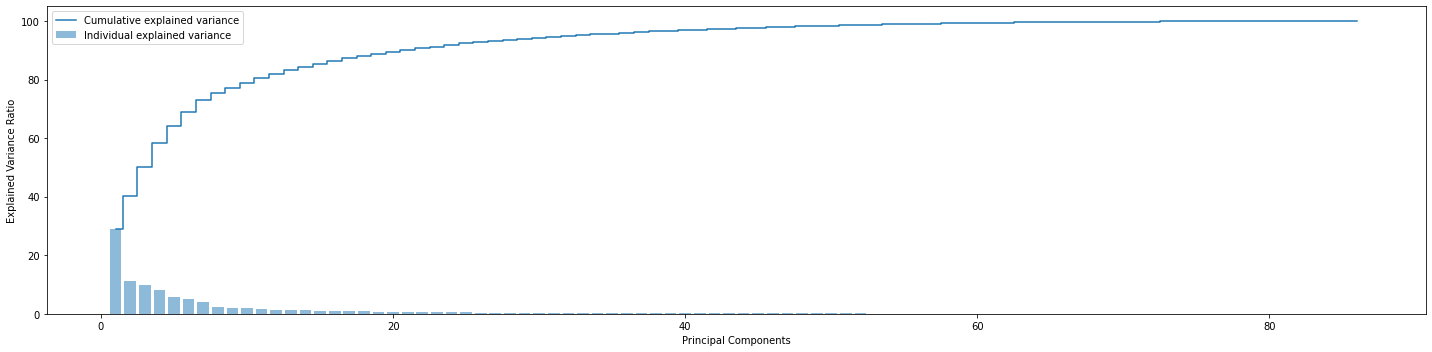

In [ ]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(20 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()


In [ ]:
# Capturing 90% variance of the data
pca = PCA(n_components = 0.90)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [ ]:
print(X_train_reduced.shape)
print(X_test_reduced.shape)

(334, 21)
(84, 21)


# Design, train and test machine learning classifiers

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 2.0 MB/s 


In [ ]:
# the classification models 
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# import zscore for scaling the data
from scipy.stats import zscore

from scipy.stats import randint as sp_randint

# methods and classes for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score

# cross-validation methods
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# feature selection methods
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# pre-processing methods
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder

In [ ]:
# DummyClassifier to predict all Accident levels
dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

Unique predicted labels:  [0 1 2 3 4]
Test score:  0.4880952380952381


In [ ]:
# Checking unique values
predictions = pd.DataFrame(dummy_pred)
predictions[0].value_counts()

0    54
2    12
3     9
1     7
4     2
Name: 0, dtype: int64

Define MultiClass-Logloss

In [ ]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

Train and test model

In [ ]:
def train_test_model(model, method, X_train, X_test, y_train, y_test, of_type, index, scale, report, save_model):
    
    if report == "yes":
        print (model)
        print ("***************************************************************************")

    if method == 'CatBoostClassifier' or method == 'LGBMClassifier':

      model.fit(X_train, y_train) # Fit the model on Training set
    else:
      model.fit(X_train, y_train) # Fit the model on Training set

    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
    
    if of_type == "coef":
        # Intercept and Coefficients
        print("The intercept for our model is {}".format(model.intercept_), "\n")
        
        for idx, col_name in enumerate(X_train.columns):
            print("The coefficient for {} is {}".format(col_name, model.coef_.ravel()[idx]))

    y_pred = model.predict(X_test) # Predict on Test set

    # Initialise mc_logloss
    mc_logloss = 1.00
    if method != 'RidgeClassifier':
      y_predictions = model.predict_proba(X_test)

    train_accuracy_score = model.score(X_train, y_train)
    test_accuracy_score = model.score(X_test, y_test)

    precision_score = precision_score(y_test, y_pred, average='weighted')
    recall_score = recall_score(y_test, y_pred, average='weighted')
    f1_score = f1_score(y_test, y_pred, average='weighted')

    if method != 'RidgeClassifier':
      mc_logloss = multiclass_logloss(y_test, y_predictions, eps=1e-15)

    if report == "yes":
      # Model - Confusion matrix
      model_cm = confusion_matrix(y_test, y_pred)

      sns.heatmap(model_cm, annot=True,  fmt='.2f', xticklabels = ["I", "II", "III", "IV", "V"] , yticklabels = ["I", "II", "III", "IV", "V"] )
      plt.ylabel('Actual')
      plt.xlabel('Predicted')
      plt.show()

      # Model - Classification report
      model_cr = classification_report(y_test, y_pred)
      print(model_cr)

    # Store the accuracy results for each model in a dataframe for final comparison
    resultsDf = pd.DataFrame({'Method': method, 'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score, 
                              'Precision': precision_score, 'Recall': recall_score, 'F1-Score': f1_score, 
                              'Multi-Class Logloss': mc_logloss}, index=[index])
    
    # Save the model
    if save_model == "yes":
      filename = 'finalised_model.sav'
      pickle.dump(model, open('Serialization'))
      
    return resultsDf  # return all the metrics along with predictions

Train and test all models

In [ ]:
import lightgbm as lgb

def train_test_allmodels(X_train_common, X_test_common, y_train, y_test, scale):

    # define classification models
    models=[['LogisticRegression',LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)],
        ['RidgeClassifier',RidgeClassifier(random_state = 1)],
        #['Lasso',Lasso(random_state = 1)],
        ['KNeighborsClassifier',KNeighborsClassifier(n_neighbors = 3)],
        ['SVC',SVC(kernel = 'rbf', probability=True)],
        ['DecisionTreeClassifier',DecisionTreeClassifier(criterion = 'gini', random_state=1)],
        ['RandomForestClassifier',RandomForestClassifier(n_estimators=10, random_state=1)],
        ['BaggingClassifier',BaggingClassifier(n_estimators=30, max_samples=0.75, random_state=1, oob_score=True)],
        ['ExtraTreesClassifier',ExtraTreesClassifier(n_estimators = 50, criterion='entropy', max_features='auto', min_samples_split=2, 
                                 bootstrap=True, oob_score=True)],
        ['AdaBoostClassifier',AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1)],
        ['GradientBoostingClassifier',GradientBoostingClassifier(loss='deviance', n_estimators=50, learning_rate=0.1, validation_fraction=0.2, 
                                       random_state=1)],
        ['CatBoostClassifier',CatBoostClassifier(task_type= 'GPU', loss_function="MultiClass", random_state=1, verbose=0)],
                                                #early_stopping_rounds = 30)],
        ['LGBMClassifier',LGBMClassifier(random_state=1, metric = "multi_logloss", objective="multiclass")],
                                         #early_stopping_rounds = 30)],
        ['XGBClassifier',XGBClassifier(min_child_weight = 7, max_depth = 6, objective="multi:softmax", learning_rate = 0.1, gamma = 0.4, 
                                       colsample_bytree = 0.5)]
    ]

    resultsDf_common = pd.DataFrame()
    i = 1
    for name, classifier in models:
        # Train and Test the model
        reg_resultsDf = train_test_model(classifier, name, X_train_common, X_test_common, y_train, y_test, 'none', i, scale, 'no', 'no')

        # Store the accuracy results for each model in a dataframe for final comparison
        resultsDf_common = pd.concat([resultsDf_common, reg_resultsDf])
        i = i+1

    return resultsDf_common

Model with Hyperparameter Tuning

In [ ]:
def hyperparameterstune_model(name, model, X_train, y_train, param_grid):
    
    start = time.time()  # note the start time 
    
    # Before starting with grid search we need to create a scoring function. This is accomplished using the make_scorer function of scikit-learn.
    mll_scorer = metrics.make_scorer(multiclass_logloss, greater_is_better=False, needs_proba=True)

    # define grid search
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    if name == 'LGBMClassifier':
      grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, n_jobs=-1, cv=cv, 
                                       scoring = mll_scorer, error_score=0)
    else:
      grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, 
                                 scoring = mll_scorer, error_score=0)
      
    model_grid_result = grid_search.fit(X_train, y_train)

    # summarize results
    print("Best F1_Score: %f using %s" % (model_grid_result.best_score_, model_grid_result.best_params_))
    means = model_grid_result.cv_results_['mean_test_score']
    stds = model_grid_result.cv_results_['std_test_score']
    params = model_grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
      if param == model_grid_result.best_params_:
        print("%f (%f) with: %r" % (mean, stdev, param))
        print("95% Confidence interval range: ({0:.4f} %, {1:.4f} %)".format(mean-(2*stdev), mean+(2*stdev)))

    end = time.time()  # note the end time
    duration = end - start  # calculate the total duration
    print("Total duration" , duration, "\n")
    
    return model_grid_result.best_estimator_

1. Modelling - Logistic Regression

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


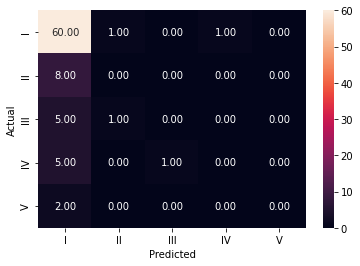

              precision    recall  f1-score   support

           0       0.75      0.97      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.71        84
   macro avg       0.15      0.19      0.17        84
weighted avg       0.55      0.71      0.62        84



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Regression without Sampling,0.754491,0.714286,0.553571,0.714286,0.623742,0.894264


In [ ]:
# For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs' handle multinomial loss; 'liblinear' is limited to one-versus-rest schemes.

resultsDf = pd.DataFrame()

# Building a Linear Regression model
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
                                                     
# Train and Test the model
resultsDf = train_test_model(lr, 'Logistic Regression without Sampling', X_train, X_test, y_train, y_test, 'none', 1, 'no', 'yes', 'no')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf

2. Decision Tree - Random Forest Classifier

   While in every machine learning problem, it’s a good rule of thumb to try a variety of algorithms, it can be especially beneficial with imbalanced datasets. Decision trees frequently perform well on imbalanced data. They work by learning a hierarchy of if/else questions and this can force both classes to be addressed.



RandomForestClassifier(n_estimators=10, random_state=1)
***************************************************************************


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


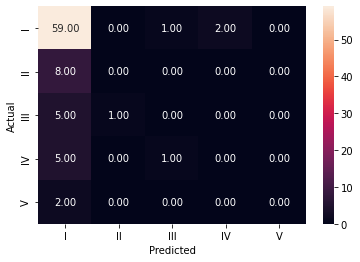

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.70        84
   macro avg       0.15      0.19      0.17        84
weighted avg       0.55      0.70      0.62        84



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Regression without Sampling,0.754491,0.714286,0.553571,0.714286,0.623742,0.894264
2,Random Forest with original data,0.955090,0.702381,0.551236,0.702381,0.617697,3.413944


In [ ]:
# Building a Random Forest Classifier on Training set
rfc_model = RandomForestClassifier(n_estimators=10, random_state=1)

# Train and Test the model
rf_df = train_test_model(rfc_model, 'Random Forest with original data', X_train, X_test, y_train, y_test, 'none', 2, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,rf_df])
resultsDf

3. Modelling - Logistic Regression - Oversampling

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


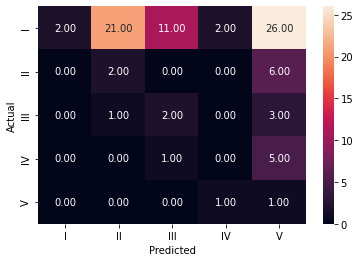

              precision    recall  f1-score   support

           0       1.00      0.03      0.06        62
           1       0.08      0.25      0.12         8
           2       0.14      0.33      0.20         6
           3       0.00      0.00      0.00         6
           4       0.02      0.50      0.05         2

    accuracy                           0.08        84
   macro avg       0.25      0.22      0.09        84
weighted avg       0.76      0.08      0.07        84



,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Regression without Sampling,0.754491,0.714286,0.553571,0.714286,0.623742,0.894264
2,Random Forest with original data,0.955090,0.702381,0.551236,0.702381,0.617697,3.413944
3,Logistic Regression with Sampling,0.362753,0.083333,0.756817,0.083333,0.073429,1.693835


In [ ]:
# Building a Linear Regression model
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
                                                     
# Train and Test the model
lr_df = train_test_model(lr, 'Logistic Regression with Sampling', X_train_up, X_test, y_train_up, y_test, 'none', 3, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,lr_df])
resultsDf

4. Modelling - Logistic Regression - SMOTE

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


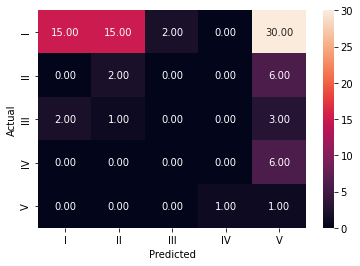

              precision    recall  f1-score   support

           0       0.88      0.24      0.38        62
           1       0.11      0.25      0.15         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.02      0.50      0.04         2

    accuracy                           0.21        84
   macro avg       0.20      0.20      0.12        84
weighted avg       0.66      0.21      0.30        84



,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Regression without Sampling,0.754491,0.714286,0.553571,0.714286,0.623742,0.894264
2,Random Forest with original data,0.955090,0.702381,0.551236,0.702381,0.617697,3.413944
3,Logistic Regression with Sampling,0.362753,0.083333,0.756817,0.083333,0.073429,1.693835
4,Logistic Regression with SMOTE,0.442915,0.214286,0.662360,0.214286,0.295933,1.654085


In [ ]:
# Building a Linear Regression model
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
                                                     
# Train and Test the model
lr_smote_df = train_test_model(lr, 'Logistic Regression with SMOTE', X_train_smote, X_test, y_train_smote, y_test, 'none', 4, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,lr_smote_df])
resultsDf

# All models - Original data

In [ ]:
# Train and Test all models with Lasso interaction terms
train_test_allmodels(X_train, X_test, y_train, y_test, 'no')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,LogisticRegression,0.754491,0.714286,0.553571,0.714286,0.623742,0.894264
2,RidgeClassifier,0.757485,0.726190,0.562798,0.726190,0.634138,1.000000
3,KNeighborsClassifier,0.739521,0.726190,0.601190,0.726190,0.642790,6.098855
4,SVC,0.739521,0.738095,0.544785,0.738095,0.626875,0.906422
5,DecisionTreeClassifier,0.994012,0.607143,0.609599,0.607143,0.606349,13.577057
6,RandomForestClassifier,0.955090,0.702381,0.551236,0.702381,0.617697,3.413944
7,BaggingClassifier,0.964072,0.714286,0.553571,0.714286,0.623742,2.304895
8,ExtraTreesClassifier,0.994012,0.738095,0.551348,0.738095,0.631199,1.571533
9,AdaBoostClassifier,0.736527,0.726190,0.663004,0.726190,0.653817,1.252899
10,GradientBoostingClassifier,0.937126,0.690476,0.579683,0.690476,0.629380,0.967223


By comparing the results from all above methods, we can select best method as Ridge classifier with f1-score 63.41% and all other methods are over fitting the training data.

## All models - SMOTE data

In [ ]:
# Train and Test all models with Lasso interaction terms
train_test_allmodels(X_train_smote, X_test, y_train_smote, y_test, 'no')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:1059: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,LogisticRegression,0.442915,0.214286,0.662360,0.214286,0.295933,1.654085
2,RidgeClassifier,0.791903,0.071429,0.005102,0.071429,0.009524,1.000000
3,KNeighborsClassifier,0.907692,0.154762,0.497024,0.154762,0.168746,8.948456
4,SVC,0.295547,0.071429,0.005102,0.071429,0.009524,1.624782
5,DecisionTreeClassifier,0.998381,0.416667,0.518088,0.416667,0.454445,20.147620
6,RandomForestClassifier,0.995951,0.666667,0.615242,0.666667,0.637530,2.447109
7,BaggingClassifier,0.995142,0.595238,0.589683,0.595238,0.588342,2.539121
8,ExtraTreesClassifier,0.998381,0.607143,0.610017,0.607143,0.608029,1.369943
9,AdaBoostClassifier,0.542510,0.726190,0.555850,0.726190,0.629704,1.311231
10,GradientBoostingClassifier,0.964372,0.607143,0.619983,0.607143,0.602237,1.087744


By comparing the results from all above methods, all are over fitting the training data.

## Hyperparameter tuning with original features

In [ ]:
# define regressor models
models=[['LogisticRegression',LogisticRegression()],
    ['Ridge',RidgeClassifier()],
    ['KNeighborsClassifier',KNeighborsClassifier()],
    ['SVC',SVC()],
    ['RandomForestClassifier',RandomForestClassifier()],
    ['BaggingClassifier',BaggingClassifier()],
    ['ExtraTreesClassifier',ExtraTreesClassifier()],
    ['AdaBoostClassifier',AdaBoostClassifier()],
    ['GradientBoostingClassifier',GradientBoostingClassifier()],
    ['CatBoostClassifier',CatBoostClassifier(verbose=False)],
    ['LGBMClassifier',LGBMClassifier(verbose=False)],
    ['XGBClassifier',XGBClassifier()]
]
# define model parameters

lr_param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                 'penalty': ['l2'],
                 #'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                 'C': [100, 10, 1.0, 0.1, 0.01]}
                 #'class_weight':['none','balanced'],
                 #'multi_class':['ovr', 'multinomial']}
ridge_param_grid = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                    'class_weight':['none','balanced'],
                    'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
lasso_param_grid = {'alpha': [0.02, 0.024, 0.025, 0.026, 0.03]}
knn_param_grid = {'n_neighbors': range(3, 21, 2),
                 'weights': ['uniform', 'distance'],
                 'metric': ['euclidean', 'manhattan', 'minkowski']}
svc_param_grid = {'kernel': ['poly', 'rbf', 'sigmoid'],
                 'C': [50, 10, 1.0, 0.1, 0.01],
                 'gamma': ['scale'],
                 'decision_function_shape': ['ovo', 'ovr']}
rf_param_grid = {'n_estimators': [10, 100, 1000],
                 'max_features': ['auto', 'sqrt', 'log2']}              
                 #'class_weight':['balanced','balanced_subsample','none']}
bag_param_grid = {'n_estimators': [10, 100, 1000],
                 'max_samples': np.arange(0.7, 0.8, 0.05)}
et_param_grid = {'n_estimators': np.arange(10,100,10),
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'min_samples_split': np.arange(2,15,1)}
                 #'class_weight':['balanced','balanced_subsample','none']}
adb_param_grid = {'n_estimators': np.arange(30,100,10),
                 'learning_rate': np.arange(0.1,1,0.5)}
gb_param_grid = {'n_estimators': [10, 50, 100, 500],
                 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                 'subsample':[0.5, 0.7, 1.0],
                 'max_depth': [3, 7, 9]}
catb_param_grid = {'task_type': 'GPU','depth': [4, 7, 10],
                  'learning_rate' : [0.03, 0.1, 0.15],
                  'l2_leaf_reg': [1,4,9],
                  'early_stopping_rounds':[50],
                  'iterations': [300],
                  'loss_function':['MultiClass']}
lightgbm_param_grid = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                  'n_estimators': [10, 50, 100, 500, 1000, 5000],
                  'min_child_samples': sp_randint(100, 500), 
                  'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
                  'boosting_type':['gbdt', 'dart', 'goss'],
                  'bagging_fraction': (0.5, 1),
                  'bagging_frequency' : (5, 8),
                  'feature_fraction': (0.5, 0.8),
                  'max_depth': (10, 13),
                  'min_data_in_leaf': (90, 120),
                  'num_leaves':(1200, 1550),
                  'metric': ['multi_logloss'],
                  'objective': ['multiclass'],
                  'num_class': [5],
                  'early_stopping_rounds':[50],
                  'verbosity':[1]}
xgb_param_grid = {'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
                  'max_depth' : [3, 4, 5, 6, 8, 10, 12, 15],
                  'min_child_weight': [ 1, 3, 5, 7],
                  'gamma': [0.0, 0.1, 0.2 , 0.3, 0.4],
                  'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7],
                  'objective': ['multi:softmax'],
                  'eval_metric': ['mlogloss'],
                  'num_class': [5]}

for name, classifier in models:
    if name == 'LogisticRegression':
        lr_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, lr_param_grid)
    elif name == 'Ridge':
        ridge_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, lasso_param_grid)
    elif name == 'KNeighborsClassifier':
        knn_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, knn_param_grid)
    elif name == 'SVC':
        svc_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, svc_param_grid)
    elif name == 'RandomForestClassifier':
        rf_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, rf_param_grid)
    elif name == 'BaggingClassifier':
        bag_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, bag_param_grid)
    elif name == 'ExtraTreesClassifier':
        et_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, et_param_grid)
    elif name == 'AdaBoostClassifier':
        adb_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, adb_param_grid)
    elif name == 'GradientBoostingClassifier':
        gb_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, gb_param_grid)
    elif name == 'CatBoostClassifier':
        catb_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, catb_param_grid)
    elif name == 'LGBMClassifier':
        lightgbm_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, lightgbm_param_grid)
    elif name == 'XGBClassifier':
        xgb_best_estimator = hyperparameterstune_model(name, classifier, X_train, y_train, xgb_param_grid)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


Best F1_Score: -0.907606 using {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
-0.907606 (0.062365) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
95% Confidence interval range: (-1.0323 %, -0.7829 %)
Total duration 14.889824151992798 



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


Best F1_Score: 0.000000 using {'alpha': 0.02}
0.000000 (0.000000) with: {'alpha': 0.02}
95% Confidence interval range: (0.0000 %, 0.0000 %)
Total duration 0.6303191184997559 



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


Best F1_Score: -2.636653 using {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
-2.636653 (1.115165) with: {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
95% Confidence interval range: (-4.8670 %, -0.4063 %)
Total duration 3.9433131217956543 



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


Best F1_Score: 0.000000 using {'C': 50, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'poly'}
0.000000 (0.000000) with: {'C': 50, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'poly'}
95% Confidence interval range: (0.0000 %, 0.0000 %)
Total duration 4.757179021835327 



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


Best F1_Score: -0.964940 using {'max_features': 'auto', 'n_estimators': 1000}
-0.964940 (0.103965) with: {'max_features': 'auto', 'n_estimators': 1000}
95% Confidence interval range: (-1.1729 %, -0.7570 %)
Total duration 63.752739906311035 



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


Best F1_Score: -1.050440 using {'max_samples': 0.7, 'n_estimators': 1000}
-1.050440 (0.211092) with: {'max_samples': 0.7, 'n_estimators': 1000}
95% Confidence interval range: (-1.4726 %, -0.6283 %)
Total duration 122.89100408554077 



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


Best F1_Score: -0.929636 using {'max_features': 'log2', 'min_samples_split': 14, 'n_estimators': 50}
-0.929636 (0.088863) with: {'max_features': 'log2', 'min_samples_split': 14, 'n_estimators': 50}
95% Confidence interval range: (-1.1074 %, -0.7519 %)
Total duration 313.3366150856018 



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


Best F1_Score: -1.119952 using {'learning_rate': 0.1, 'n_estimators': 30}
-1.119952 (0.057614) with: {'learning_rate': 0.1, 'n_estimators': 30}
95% Confidence interval range: (-1.2352 %, -1.0047 %)
Total duration 22.40594792366028 



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


KeyboardInterrupt: ignored

Bootstrap Sampling - RandomForestClassifier

In [ ]:
ind_feat_df.drop(['Accident Level','Potential Accident Level'], axis = 1, inplace=True) # Considering all Predictors

# Consider only top 30 GLOVE features
ind_feat_df = ind_feat_df.join(y.reset_index(drop=True))
ind_feat_df.head(2)

,Year,Month,Day,WeekofYear,Season,Weekday,Country_02,Country_03,Local_02,Local_03,Local_04,Local_05,Local_06,Local_07,Local_08,Local_09,Local_10,Local_11,Local_12,Male,IS_Mining,IS_Others,EmpType_Third_Party,EmpType_Third_Party_(Remote),CR_Blocking_and_isolation_of_energies,CR_Burn,CR_Chemical_substances,CR_Confined_space,CR_Cut,CR_Electrical_Shock,CR_Electrical_installation,CR_Fall,CR_Fall_prevention,CR_Fall_prevention_(same_level),CR_Individual_protection_equipment,CR_Liquid_Metal,CR_Machine_Protection,CR_Manual_Tools,CR_Not_applicable,CR_Others,...,CR_Projection/Burning,CR_Projection/Choco,CR_Projection/Manual_Tools,CR_Projection_of_fragments,CR_Suspended_Loads,CR_Traffic,CR_Vehicles_and_Mobile_Equipment,CR_Venomous_Animals,CR_remains_of_choco,TFIDF_activity,TFIDF_area,TFIDF_causing,TFIDF_employee,TFIDF_hand,TFIDF_injury,TFIDF_left,TFIDF_operator,TFIDF_right,TFIDF_time,TFIDF_causing injury,TFIDF_described injury,TFIDF_employee reports,TFIDF_finger left,TFIDF_injury described,TFIDF_left foot,TFIDF_left hand,TFIDF_medical center,TFIDF_right hand,TFIDF_time accident,TFIDF_causing injury described,TFIDF_described time accident,TFIDF_finger left hand,TFIDF_finger right hand,TFIDF_generating described injury,TFIDF_hand causing injury,TFIDF_injury time accident,TFIDF_left hand causing,TFIDF_right hand causing,TFIDF_time accident employee,Accident Level
0,2016,1,1,53,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2016,1,2,53,0,5,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
values = ind_feat_df.values

# Number of bootstrap samples to create
n_iterations = 1000        

# size of a bootstrap sample
n_size = int(len(ind_feat_df) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
rf_stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
     # fit model
    rfTree = RandomForestClassifier(n_estimators=100)

    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 

    # Take the target column for all rows in test set
    y_bs_test = test[:,-1]  

    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_bs_test)
    predictions = rfTree.predict(test[:, :-1]) 

    rf_stats.append(score)
# plot scores
plt.hist(rf_stats)
plt.show()

# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(rf_stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(rf_stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

KeyboardInterrupt: ignored

Bootstrap Sampling - AdaBoostClassifier

In [ ]:
values = ind_feat_df.values

# Number of bootstrap samples to create
n_iterations = 1000        

# size of a bootstrap sample
n_size = int(len(ind_feat_df) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
adab_stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
     # fit model
    adabTree = AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1)

    # fit against independent variables and corresponding target values
    adabTree.fit(train[:,:-1], train[:,-1]) 

    # Take the target column for all rows in test set
    y_bs_test = test[:,-1]  

    # evaluate model
    # predict based on independent variables in the test data
    score = adabTree.score(test[:, :-1] , y_bs_test)
    predictions = adabTree.predict(test[:, :-1]) 

    adab_stats.append(score)

In [ ]:
# plot scores
plt.hist(adab_stats)
plt.show()

# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(adab_stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(adab_stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

Bootstrap Sampling - XGBClassifier

In [ ]:
values = ind_feat_df.values

# Number of bootstrap samples to create
n_iterations = 1000        

# size of a bootstrap sample
n_size = int(len(ind_feat_df) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
xgb_stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
     # fit model
    xgbTree = XGBClassifier(max_depth = 6, objective="multi:softmax", learning_rate = 0.1, gamma = 0.4)

    # fit against independent variables and corresponding target values
    xgbTree.fit(train[:,:-1], train[:,-1]) 

    # Take the target column for all rows in test set
    y_bs_test = test[:,-1]  

    # evaluate model
    # predict based on independent variables in the test data
    score = xgbTree.score(test[:, :-1] , y_bs_test)
    predictions = xgbTree.predict(test[:, :-1]) 

    xgb_stats.append(score)

In [ ]:
# plot scores
plt.hist(xgb_stats)
plt.show()

# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(xgb_stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(xgb_stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# Neural networks classifiers

In [ ]:
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.layers import Input
from keras.layers.merge import Concatenate
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from keras.models import Model
from tensorflow.keras.layers import Flatten, Activation, Dense, LSTM, BatchNormalization, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D
from keras.models import model_from_json
from keras.regularizers import l1, l2, l1_l2
from keras.constraints import maxnorm, min_max_norm
from keras.constraints import unit_norm
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json

from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier

# Keras pre-processing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
# disable keras warnings
tf.get_logger().setLevel('ERROR')

In [ ]:
# get the accuracy, precision, recall, f1 score from model
def get_classification_metrics(model, X_test, y_test, target_type):
  
  # predict probabilities for test set
  yhat_probs = model.predict(X_test, verbose=0) # Multiclass

  # predict crisp classes for test set
  if target_type == 'multi_class':
    yhat_classes = model.predict_classes(X_test, verbose=0) # Multiclass
  else:
    yhat_classes = (np.asarray(model.predict(X_test))).round() # Multilabel

  # reduce to 1d array
  yhat_probs = yhat_probs[:, 0]

  # accuracy: (tp + tn) / (p + n)
  accuracy = accuracy_score(y_test, yhat_classes)

  # precision tp / (tp + fp)
  precision = precision_score(y_test, yhat_classes, average='micro')

  # recall: tp / (tp + fn)
  recall = recall_score(y_test, yhat_classes, average='micro')

  # f1: 2 tp / (2 tp + fp + fn)
  f1 = f1_score(y_test, yhat_classes, average='micro')

  return accuracy, precision, recall, f1

In [ ]:
class Metrics(tf.keras.callbacks.Callback):

    def __init__(self, validation_data=()):
        super().__init__()
        self.validation_data = validation_data

    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        xVal, yVal, target_type = self.validation_data
        if target_type == 'multi_class':
          val_predict_classes = model.predict_classes(xVal, verbose=0) # Multiclass
        else:
          val_predict_classes = (np.asarray(self.model.predict(xVal))).round() # Multilabel
        
        
        val_targ = yVal

        _val_f1 = f1_score(val_targ, val_predict_classes, average='micro')
        _val_recall = recall_score(val_targ, val_predict_classes, average='micro')
        _val_precision = precision_score(val_targ, val_predict_classes, average='micro')
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        #print("— train_f1: %f — train_precision: %f — train_recall %f" % (_val_f1, _val_precision, _val_recall))
        return

Convert Classification to Numeric problem
In this section, we will create a classification model that uses categorical columns and tf-idf features from accident description and label encoded target variable. We can use simple densely connected neural networks to make predictions.

Since we have ordinal relationship between each category in target variable, I have considered this one as numerical/regression problem and try to observe the ANN behaviour.

In [ ]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

# define the model
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(150, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(40, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

# compile the keras model
#opt = optimizers.Adam(lr=1e-3)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

# fit the keras model on the dataset
training_history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, validation_data=(X_test, y_test), callbacks=[rlrp])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
42/42 [==============================] - 2s 11ms/step - loss: 1.1232 - accuracy: 0.4611 - val_loss: 1.0748 - val_accuracy: 0.3452 - lr: 0.0010
Epoch 2/100
42/42 [==============================] - 0s 4ms/step - loss: 1.0045 - accuracy: 0.4551 - val_loss: 1.0182 - val_accuracy: 0.4167 - lr: 0.0010
Epoch 3/100
42/42 [==============================] - 0s 4ms/step - loss: 0.9184 - accuracy: 0.5090 - val_loss: 1.0548 - val_accuracy: 0.6190 - lr: 0.0010
Epoch 4/100
42/42 [==============================] - 0s 4ms/step - loss: 0.8491 - accuracy: 0.5180 - val_loss: 0.9747 - val_accuracy: 0.4048 - lr: 0.0010
Epoch 5/100
42/42 [==============================] - 0s 4ms/step - loss: 0.7808 - accuracy: 0.4970 - val_loss: 1.0522 - val_accuracy: 0.5714 - lr: 0.0010
Epoch 6/100
42/42 [==============================] - 0s 4ms/step - loss: 0.7324 - accuracy: 0.5838 - val_loss: 0.9713 - val_accuracy: 0.3571 - lr: 0.0010
Epoch 7/100
42/42 [==============================] - 0s 4ms/step - loss: 0.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                4350      
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 150)               15150     
                                                                 
 dense_3 (Dense)             (None, 40)                6040      
                                                                 
 dense_4 (Dense)             (None, 1)                 41        
                                                                 
Total params: 30,681
Trainable params: 30,681
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, batch_size=8, verbose=0)
print('Test accuracy: %.2f' % (accuracy*100))

Test accuracy: 53.57


Text(0.5, 1.0, 'Training and validation loss')

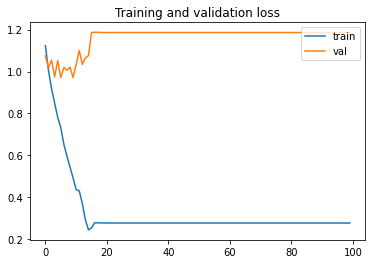

In [ ]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot  (epochs, training_history.history['loss'], label = 'train')
plt.plot  (epochs, training_history.history['val_loss'], label = 'val')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Above one is underfit model, it can be identified from the learning curve of the training loss only. It is showing noisy values of relatively high loss, indicating that the model was unable to learn the training dataset at all and model does not have a suitable capacity for the complexity of the dataset

Multiclass classification - Target variable - One hot encoded
In this section, we will create a classification model that uses categorical columns and tf-idf features from accident description and one-hot encoded target variable. We can use simple densely connected neural networks to make predictions.

In [ ]:
os.environ['PYTHONHASHSEED']=str(7)

# Reproduce the results
def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(7)
   #np.random.seed(7)
   #random.seed(7)
   tf.random.set_seed(7)

In [ ]:
# fix random seed for reproducibility
reset_random_seeds()
#param = 1e-9
param = 1e-4

# define the model
model = Sequential()

model.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                kernel_constraint=unit_norm()))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm()))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm())) # Multilabel

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_train, y_train_dummy, target_type))

# fit the keras model on the dataset
training_history = model.fit(X_train, y_train_dummy, epochs=100, batch_size=8, verbose=1, validation_data=(X_test, y_test_dummy), callbacks=[rlrp, metrics])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
42/42 [==============================] - 2s 21ms/step - loss: 1.8866 - categorical_accuracy: 0.1856 - val_loss: 1.3625 - val_categorical_accuracy: 0.6905 - lr: 0.0010
Epoch 2/100
35/42 [========================>.....] - ETA: 0s - loss: 1.6423 - categorical_accuracy: 0.3393

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 0s 10ms/step - loss: 1.6293 - categorical_accuracy: 0.3533 - val_loss: 1.1745 - val_categorical_accuracy: 0.7500 - lr: 0.0010
Epoch 3/100
42/42 [==============================] - 0s 11ms/step - loss: 1.3536 - categorical_accuracy: 0.5000 - val_loss: 1.0627 - val_categorical_accuracy: 0.7381 - lr: 0.0010
Epoch 4/100
42/42 [==============================] - 0s 10ms/step - loss: 1.2328 - categorical_accuracy: 0.5599 - val_loss: 0.9935 - val_categorical_accuracy: 0.7381 - lr: 0.0010
Epoch 5/100
42/42 [==============================] - 0s 10ms/step - loss: 1.0959 - categorical_accuracy: 0.6347 - val_loss: 0.9630 - val_categorical_accuracy: 0.7381 - lr: 0.0010
Epoch 6/100
42/42 [==============================] - 0s 10ms/step - loss: 1.1295 - categorical_accuracy: 0.6437 - val_loss: 0.9273 - val_categorical_accuracy: 0.7381 - lr: 0.0010
Epoch 7/100
42/42 [==============================] - 0s 10ms/step - loss: 1.0738 - categorical_accuracy: 0.6826 - val

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                870       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 10)               40        
 hNormalization)                                      

In [ ]:
 # evaluate the keras model
_, train_accuracy = model.evaluate(X_train, y_train_dummy, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate(X_test, y_test_dummy, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 73.95
Test accuracy: 73.81


In [ ]:
accuracy, precision, recall, f1 = get_classification_metrics(model, X_test, y_test_dummy, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.738095
Precision: 0.738095
Recall: 0.738095
F1 score: 0.738095


Text(0.5, 1.0, 'Training and validation loss')

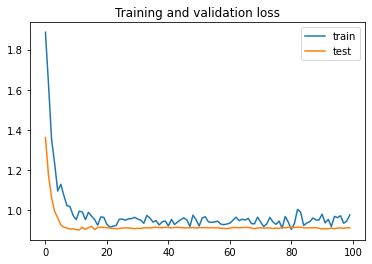

In [ ]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Above one is good fit, it is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values. The loss of the model will almost always be lower on the training dataset than the validation dataset.

Text(0.5, 1.0, 'Training and validation accuracy')

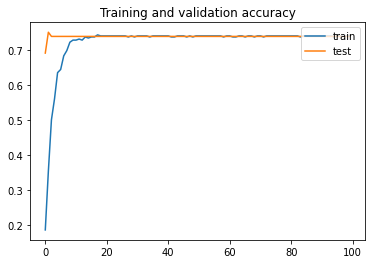

In [ ]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['categorical_accuracy'], label = 'train')
plt.plot(epochs, training_history.history['val_categorical_accuracy'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

We could see it accuracy continually rise during training. As expected, we see the learning curves for accuracy on the test dataset plateau, indicating that the model has no longer overfit the training dataset and it is generalized model.

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
model.save("finalized_keras_model.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


Multiclass classification - Target variable - One hot encoded with SMOTE data

In this section, we will create a classification model that uses categorical columns and tf-idf features from accident description and one-hot encoded target variable. We can use simple densely connected neural networks to make predictions.

In [ ]:
# fix random seed for reproducibility
reset_random_seeds()
#param = 1e-9
param = 1e-4

# define the model
model = Sequential()

model.add(Dense(10, input_dim=X_train_smote.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                kernel_constraint=unit_norm()))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm()))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm())) # Multilabel

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_train_smote, y_train_smote_dummy, target_type))

# fit the keras model on the dataset
training_history = model.fit(X_train_smote, y_train_smote_dummy, epochs=100, batch_size=8, verbose=1, validation_data=(X_test, y_test_dummy), callbacks=[rlrp, metrics])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
155/155 [==============================] - 2s 9ms/step - loss: 1.8853 - categorical_accuracy: 0.2065 - val_loss: 1.8065 - val_categorical_accuracy: 0.0238 - lr: 0.0010
Epoch 2/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.8214 - categorical_accuracy: 0.2222

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.8121 - categorical_accuracy: 0.2049 - val_loss: 1.6389 - val_categorical_accuracy: 0.1310 - lr: 0.0010
Epoch 3/100
 35/155 [=====>........................] - ETA: 0s - loss: 1.7629 - categorical_accuracy: 0.2000

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.7434 - categorical_accuracy: 0.2186 - val_loss: 1.5794 - val_categorical_accuracy: 0.1905 - lr: 0.0010
Epoch 4/100
 35/155 [=====>........................] - ETA: 0s - loss: 1.7564 - categorical_accuracy: 0.1821

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.7169 - categorical_accuracy: 0.2057 - val_loss: 1.7725 - val_categorical_accuracy: 0.1429 - lr: 0.0010
Epoch 5/100
 37/155 [======>.......................] - ETA: 0s - loss: 1.7301 - categorical_accuracy: 0.2162

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.7130 - categorical_accuracy: 0.2105 - val_loss: 2.0708 - val_categorical_accuracy: 0.1071 - lr: 0.0010
Epoch 6/100
 37/155 [======>.......................] - ETA: 0s - loss: 1.6425 - categorical_accuracy: 0.2635

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6820 - categorical_accuracy: 0.2049 - val_loss: 2.1835 - val_categorical_accuracy: 0.0952 - lr: 0.0010
Epoch 7/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.7135 - categorical_accuracy: 0.2049

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6843 - categorical_accuracy: 0.2138 - val_loss: 2.1929 - val_categorical_accuracy: 0.0952 - lr: 0.0010
Epoch 8/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.6639 - categorical_accuracy: 0.2153

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6551 - categorical_accuracy: 0.2162 - val_loss: 2.0793 - val_categorical_accuracy: 0.1310 - lr: 0.0010
Epoch 9/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.6395 - categorical_accuracy: 0.2118

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6375 - categorical_accuracy: 0.2211 - val_loss: 2.1207 - val_categorical_accuracy: 0.1190 - lr: 1.0000e-07
Epoch 10/100
 35/155 [=====>........................] - ETA: 0s - loss: 1.6507 - categorical_accuracy: 0.1893

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6463 - categorical_accuracy: 0.2073 - val_loss: 2.1106 - val_categorical_accuracy: 0.1310 - lr: 1.0000e-07
Epoch 11/100
 35/155 [=====>........................] - ETA: 0s - loss: 1.6628 - categorical_accuracy: 0.2393

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6482 - categorical_accuracy: 0.2154 - val_loss: 2.2242 - val_categorical_accuracy: 0.1190 - lr: 1.0000e-07
Epoch 12/100
 37/155 [======>.......................] - ETA: 0s - loss: 1.6350 - categorical_accuracy: 0.2128

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6619 - categorical_accuracy: 0.1919 - val_loss: 2.1552 - val_categorical_accuracy: 0.1310 - lr: 1.0000e-07
Epoch 13/100
 34/155 [=====>........................] - ETA: 0s - loss: 1.6499 - categorical_accuracy: 0.2059

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6528 - categorical_accuracy: 0.1935 - val_loss: 2.0971 - val_categorical_accuracy: 0.1310 - lr: 1.0000e-07
Epoch 14/100
 35/155 [=====>........................] - ETA: 0s - loss: 1.6647 - categorical_accuracy: 0.1857

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6437 - categorical_accuracy: 0.2235 - val_loss: 2.0982 - val_categorical_accuracy: 0.1310 - lr: 1.0000e-11
Epoch 15/100
 35/155 [=====>........................] - ETA: 0s - loss: 1.6637 - categorical_accuracy: 0.1857

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6540 - categorical_accuracy: 0.1943 - val_loss: 2.0663 - val_categorical_accuracy: 0.1071 - lr: 1.0000e-11
Epoch 16/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.6448 - categorical_accuracy: 0.2014

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6463 - categorical_accuracy: 0.2073 - val_loss: 2.0788 - val_categorical_accuracy: 0.1190 - lr: 1.0000e-11
Epoch 17/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.6267 - categorical_accuracy: 0.2361

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6556 - categorical_accuracy: 0.2049 - val_loss: 2.1223 - val_categorical_accuracy: 0.1190 - lr: 1.0000e-11
Epoch 18/100
 34/155 [=====>........................] - ETA: 0s - loss: 1.6411 - categorical_accuracy: 0.1765

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6454 - categorical_accuracy: 0.1984 - val_loss: 2.1083 - val_categorical_accuracy: 0.1190 - lr: 1.0000e-11
Epoch 19/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.6792 - categorical_accuracy: 0.1875

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6589 - categorical_accuracy: 0.2130 - val_loss: 2.1419 - val_categorical_accuracy: 0.1310 - lr: 1.0000e-15
Epoch 20/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.6312 - categorical_accuracy: 0.2188

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6525 - categorical_accuracy: 0.2194 - val_loss: 2.0597 - val_categorical_accuracy: 0.1190 - lr: 1.0000e-15
Epoch 21/100
 37/155 [======>.......................] - ETA: 0s - loss: 1.6744 - categorical_accuracy: 0.1791

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6559 - categorical_accuracy: 0.2057 - val_loss: 2.1067 - val_categorical_accuracy: 0.1190 - lr: 1.0000e-15
Epoch 22/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.6768 - categorical_accuracy: 0.1910

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6599 - categorical_accuracy: 0.1895 - val_loss: 2.1076 - val_categorical_accuracy: 0.1310 - lr: 1.0000e-15
Epoch 23/100
 35/155 [=====>........................] - ETA: 0s - loss: 1.6633 - categorical_accuracy: 0.1893

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6460 - categorical_accuracy: 0.1943 - val_loss: 2.0939 - val_categorical_accuracy: 0.1310 - lr: 1.0000e-15
Epoch 24/100
 34/155 [=====>........................] - ETA: 0s - loss: 1.6571 - categorical_accuracy: 0.2206

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6507 - categorical_accuracy: 0.2194 - val_loss: 2.1410 - val_categorical_accuracy: 0.1190 - lr: 1.0000e-19
Epoch 25/100
 37/155 [======>.......................] - ETA: 0s - loss: 1.6607 - categorical_accuracy: 0.1723

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6456 - categorical_accuracy: 0.1960 - val_loss: 2.1182 - val_categorical_accuracy: 0.0952 - lr: 1.0000e-19
Epoch 26/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.6370 - categorical_accuracy: 0.2014

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6343 - categorical_accuracy: 0.2121 - val_loss: 2.1125 - val_categorical_accuracy: 0.1310 - lr: 1.0000e-19
Epoch 27/100
 34/155 [=====>........................] - ETA: 0s - loss: 1.6694 - categorical_accuracy: 0.1581

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6537 - categorical_accuracy: 0.1822 - val_loss: 2.1719 - val_categorical_accuracy: 0.1310 - lr: 1.0000e-19
Epoch 28/100
 37/155 [======>.......................] - ETA: 0s - loss: 1.6566 - categorical_accuracy: 0.2466

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6502 - categorical_accuracy: 0.2097 - val_loss: 2.1926 - val_categorical_accuracy: 0.1190 - lr: 1.0000e-19
Epoch 29/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.6305 - categorical_accuracy: 0.2049

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6579 - categorical_accuracy: 0.2073 - val_loss: 2.1460 - val_categorical_accuracy: 0.1310 - lr: 1.0000e-23
Epoch 30/100
 37/155 [======>.......................] - ETA: 0s - loss: 1.6421 - categorical_accuracy: 0.2027

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6386 - categorical_accuracy: 0.2032 - val_loss: 2.2015 - val_categorical_accuracy: 0.1310 - lr: 1.0000e-23
Epoch 31/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.6459 - categorical_accuracy: 0.1875

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6472 - categorical_accuracy: 0.1935 - val_loss: 2.1639 - val_categorical_accuracy: 0.1310 - lr: 1.0000e-23
Epoch 32/100
 35/155 [=====>........................] - ETA: 0s - loss: 1.6125 - categorical_accuracy: 0.2357

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6437 - categorical_accuracy: 0.2032 - val_loss: 2.1317 - val_categorical_accuracy: 0.1190 - lr: 1.0000e-23
Epoch 33/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.6554 - categorical_accuracy: 0.2396

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6446 - categorical_accuracy: 0.2097 - val_loss: 2.1084 - val_categorical_accuracy: 0.1310 - lr: 1.0000e-23
Epoch 34/100
 35/155 [=====>........................] - ETA: 0s - loss: 1.6076 - categorical_accuracy: 0.2429

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6402 - categorical_accuracy: 0.2146 - val_loss: 2.1195 - val_categorical_accuracy: 0.1310 - lr: 1.0000e-27
Epoch 35/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.6509 - categorical_accuracy: 0.2049

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6502 - categorical_accuracy: 0.2024 - val_loss: 2.1459 - val_categorical_accuracy: 0.1190 - lr: 1.0000e-27
Epoch 36/100
 34/155 [=====>........................] - ETA: 0s - loss: 1.6767 - categorical_accuracy: 0.1728

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6398 - categorical_accuracy: 0.2154 - val_loss: 2.1421 - val_categorical_accuracy: 0.1310 - lr: 1.0000e-27
Epoch 37/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.5944 - categorical_accuracy: 0.2535

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6436 - categorical_accuracy: 0.1887 - val_loss: 2.1210 - val_categorical_accuracy: 0.1310 - lr: 1.0000e-27
Epoch 38/100
 35/155 [=====>........................] - ETA: 0s - loss: 1.6796 - categorical_accuracy: 0.2214

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6549 - categorical_accuracy: 0.1927 - val_loss: 2.1705 - val_categorical_accuracy: 0.1310 - lr: 1.0000e-27
Epoch 39/100
 34/155 [=====>........................] - ETA: 0s - loss: 1.6338 - categorical_accuracy: 0.2353

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6464 - categorical_accuracy: 0.2211 - val_loss: 2.1260 - val_categorical_accuracy: 0.1190 - lr: 1.0000e-31
Epoch 40/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.6659 - categorical_accuracy: 0.1910

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 7ms/step - loss: 1.6566 - categorical_accuracy: 0.1951 - val_loss: 2.1328 - val_categorical_accuracy: 0.1310 - lr: 1.0000e-31
Epoch 41/100
 33/155 [=====>........................] - ETA: 0s - loss: 1.6593 - categorical_accuracy: 0.2008

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6560 - categorical_accuracy: 0.2113 - val_loss: 2.1325 - val_categorical_accuracy: 0.1190 - lr: 1.0000e-31
Epoch 42/100
 34/155 [=====>........................] - ETA: 0s - loss: 1.6291 - categorical_accuracy: 0.2426

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 7ms/step - loss: 1.6495 - categorical_accuracy: 0.2073 - val_loss: 2.2100 - val_categorical_accuracy: 0.1310 - lr: 1.0000e-31
Epoch 43/100
 34/155 [=====>........................] - ETA: 0s - loss: 1.6587 - categorical_accuracy: 0.2132

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6587 - categorical_accuracy: 0.1984 - val_loss: 2.1092 - val_categorical_accuracy: 0.1190 - lr: 1.0000e-31
Epoch 44/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.6517 - categorical_accuracy: 0.2396

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 7ms/step - loss: 1.6405 - categorical_accuracy: 0.2283 - val_loss: 2.0881 - val_categorical_accuracy: 0.1071 - lr: 1.0000e-35
Epoch 45/100
 37/155 [======>.......................] - ETA: 0s - loss: 1.6665 - categorical_accuracy: 0.1723

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6601 - categorical_accuracy: 0.1911 - val_loss: 2.0630 - val_categorical_accuracy: 0.1310 - lr: 1.0000e-35
Epoch 46/100
 34/155 [=====>........................] - ETA: 0s - loss: 1.6484 - categorical_accuracy: 0.2279

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 7ms/step - loss: 1.6593 - categorical_accuracy: 0.1895 - val_loss: 2.0684 - val_categorical_accuracy: 0.1310 - lr: 1.0000e-35
Epoch 47/100
 33/155 [=====>........................] - ETA: 0s - loss: 1.6530 - categorical_accuracy: 0.1856

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 7ms/step - loss: 1.6388 - categorical_accuracy: 0.2081 - val_loss: 2.1549 - val_categorical_accuracy: 0.1310 - lr: 1.0000e-35
Epoch 48/100
 34/155 [=====>........................] - ETA: 0s - loss: 1.6772 - categorical_accuracy: 0.1875

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 7ms/step - loss: 1.6455 - categorical_accuracy: 0.2097 - val_loss: 2.1452 - val_categorical_accuracy: 0.1310 - lr: 1.0000e-35
Epoch 49/100
 34/155 [=====>........................] - ETA: 0s - loss: 1.6280 - categorical_accuracy: 0.2206

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 7ms/step - loss: 1.6488 - categorical_accuracy: 0.1992 - val_loss: 2.1750 - val_categorical_accuracy: 0.1310 - lr: 1.0000e-39
Epoch 50/100
 33/155 [=====>........................] - ETA: 0s - loss: 1.6773 - categorical_accuracy: 0.1288

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 7ms/step - loss: 1.6606 - categorical_accuracy: 0.1862 - val_loss: 2.1778 - val_categorical_accuracy: 0.1310 - lr: 1.0000e-39
Epoch 51/100
 34/155 [=====>........................] - ETA: 0s - loss: 1.6809 - categorical_accuracy: 0.1397

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 7ms/step - loss: 1.6614 - categorical_accuracy: 0.1951 - val_loss: 2.1467 - val_categorical_accuracy: 0.1310 - lr: 1.0000e-39
Epoch 52/100
 33/155 [=====>........................] - ETA: 0s - loss: 1.6127 - categorical_accuracy: 0.2045

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 7ms/step - loss: 1.6445 - categorical_accuracy: 0.2049 - val_loss: 2.0713 - val_categorical_accuracy: 0.1190 - lr: 1.0000e-39
Epoch 53/100
 32/155 [=====>........................] - ETA: 0s - loss: 1.6765 - categorical_accuracy: 0.1914

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 7ms/step - loss: 1.6413 - categorical_accuracy: 0.2186 - val_loss: 2.1018 - val_categorical_accuracy: 0.1310 - lr: 1.0000e-39
Epoch 54/100
 33/155 [=====>........................] - ETA: 0s - loss: 1.6778 - categorical_accuracy: 0.1970

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 7ms/step - loss: 1.6654 - categorical_accuracy: 0.1919 - val_loss: 2.1152 - val_categorical_accuracy: 0.1310 - lr: 9.9492e-44
Epoch 55/100
 34/155 [=====>........................] - ETA: 0s - loss: 1.6469 - categorical_accuracy: 0.2096

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 7ms/step - loss: 1.6376 - categorical_accuracy: 0.2073 - val_loss: 2.1554 - val_categorical_accuracy: 0.1071 - lr: 9.9492e-44
Epoch 56/100
 34/155 [=====>........................] - ETA: 0s - loss: 1.6821 - categorical_accuracy: 0.2022

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 7ms/step - loss: 1.6660 - categorical_accuracy: 0.1943 - val_loss: 2.1401 - val_categorical_accuracy: 0.1190 - lr: 9.9492e-44
Epoch 57/100
 34/155 [=====>........................] - ETA: 0s - loss: 1.6595 - categorical_accuracy: 0.2132

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 7ms/step - loss: 1.6553 - categorical_accuracy: 0.1919 - val_loss: 2.1319 - val_categorical_accuracy: 0.1190 - lr: 9.9492e-44
Epoch 58/100
 34/155 [=====>........................] - ETA: 0s - loss: 1.6406 - categorical_accuracy: 0.2132

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 7ms/step - loss: 1.6499 - categorical_accuracy: 0.1968 - val_loss: 2.1287 - val_categorical_accuracy: 0.1190 - lr: 9.9492e-44
Epoch 59/100
 33/155 [=====>........................] - ETA: 0s - loss: 1.6668 - categorical_accuracy: 0.2311

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 7ms/step - loss: 1.6697 - categorical_accuracy: 0.2049 - val_loss: 2.1396 - val_categorical_accuracy: 0.1310 - lr: 0.0000e+00
Epoch 60/100
 32/155 [=====>........................] - ETA: 0s - loss: 1.6569 - categorical_accuracy: 0.1758

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 7ms/step - loss: 1.6455 - categorical_accuracy: 0.2105 - val_loss: 2.0864 - val_categorical_accuracy: 0.1310 - lr: 0.0000e+00
Epoch 61/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.6538 - categorical_accuracy: 0.2014

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6503 - categorical_accuracy: 0.2121 - val_loss: 2.1262 - val_categorical_accuracy: 0.1310 - lr: 0.0000e+00
Epoch 62/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.6819 - categorical_accuracy: 0.1875

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6596 - categorical_accuracy: 0.2024 - val_loss: 2.1105 - val_categorical_accuracy: 0.1310 - lr: 0.0000e+00
Epoch 63/100
 34/155 [=====>........................] - ETA: 0s - loss: 1.6555 - categorical_accuracy: 0.2206

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6532 - categorical_accuracy: 0.2057 - val_loss: 2.0902 - val_categorical_accuracy: 0.1310 - lr: 0.0000e+00
Epoch 64/100
 35/155 [=====>........................] - ETA: 0s - loss: 1.6474 - categorical_accuracy: 0.1964

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 7ms/step - loss: 1.6432 - categorical_accuracy: 0.2138 - val_loss: 2.1324 - val_categorical_accuracy: 0.1190 - lr: 0.0000e+00
Epoch 65/100
 35/155 [=====>........................] - ETA: 0s - loss: 1.6578 - categorical_accuracy: 0.2286

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6516 - categorical_accuracy: 0.2154 - val_loss: 2.1069 - val_categorical_accuracy: 0.1071 - lr: 0.0000e+00
Epoch 66/100
 35/155 [=====>........................] - ETA: 0s - loss: 1.6744 - categorical_accuracy: 0.1821

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6730 - categorical_accuracy: 0.1911 - val_loss: 2.0672 - val_categorical_accuracy: 0.1310 - lr: 0.0000e+00
Epoch 67/100
 34/155 [=====>........................] - ETA: 0s - loss: 1.6443 - categorical_accuracy: 0.1985

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6525 - categorical_accuracy: 0.1935 - val_loss: 2.0927 - val_categorical_accuracy: 0.0952 - lr: 0.0000e+00
Epoch 68/100
 34/155 [=====>........................] - ETA: 0s - loss: 1.6656 - categorical_accuracy: 0.2096

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6522 - categorical_accuracy: 0.2089 - val_loss: 2.1307 - val_categorical_accuracy: 0.1310 - lr: 0.0000e+00
Epoch 69/100
 35/155 [=====>........................] - ETA: 0s - loss: 1.6242 - categorical_accuracy: 0.2107

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6437 - categorical_accuracy: 0.2081 - val_loss: 2.1514 - val_categorical_accuracy: 0.1310 - lr: 0.0000e+00
Epoch 70/100
 35/155 [=====>........................] - ETA: 0s - loss: 1.6744 - categorical_accuracy: 0.2000

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6648 - categorical_accuracy: 0.1984 - val_loss: 2.1097 - val_categorical_accuracy: 0.1310 - lr: 0.0000e+00
Epoch 71/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.6162 - categorical_accuracy: 0.2292

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6492 - categorical_accuracy: 0.2081 - val_loss: 2.1262 - val_categorical_accuracy: 0.1071 - lr: 0.0000e+00
Epoch 72/100
 35/155 [=====>........................] - ETA: 0s - loss: 1.6450 - categorical_accuracy: 0.1679

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 7ms/step - loss: 1.6377 - categorical_accuracy: 0.1984 - val_loss: 2.1395 - val_categorical_accuracy: 0.1310 - lr: 0.0000e+00
Epoch 73/100
 37/155 [======>.......................] - ETA: 0s - loss: 1.6545 - categorical_accuracy: 0.2128

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6622 - categorical_accuracy: 0.2113 - val_loss: 2.1089 - val_categorical_accuracy: 0.0952 - lr: 0.0000e+00
Epoch 74/100
 34/155 [=====>........................] - ETA: 0s - loss: 1.6640 - categorical_accuracy: 0.2022

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6533 - categorical_accuracy: 0.2024 - val_loss: 2.0755 - val_categorical_accuracy: 0.1310 - lr: 0.0000e+00
Epoch 75/100
 35/155 [=====>........................] - ETA: 0s - loss: 1.6430 - categorical_accuracy: 0.2357

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6436 - categorical_accuracy: 0.2138 - val_loss: 2.1184 - val_categorical_accuracy: 0.1190 - lr: 0.0000e+00
Epoch 76/100
 35/155 [=====>........................] - ETA: 0s - loss: 1.6406 - categorical_accuracy: 0.2036

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6422 - categorical_accuracy: 0.2113 - val_loss: 2.1179 - val_categorical_accuracy: 0.1310 - lr: 0.0000e+00
Epoch 77/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.6603 - categorical_accuracy: 0.2153

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6451 - categorical_accuracy: 0.2154 - val_loss: 2.1371 - val_categorical_accuracy: 0.1190 - lr: 0.0000e+00
Epoch 78/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.6397 - categorical_accuracy: 0.1875

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6511 - categorical_accuracy: 0.1984 - val_loss: 2.1354 - val_categorical_accuracy: 0.1310 - lr: 0.0000e+00
Epoch 79/100
 37/155 [======>.......................] - ETA: 0s - loss: 1.6609 - categorical_accuracy: 0.1588

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6570 - categorical_accuracy: 0.1879 - val_loss: 2.1227 - val_categorical_accuracy: 0.1071 - lr: 0.0000e+00
Epoch 80/100
 35/155 [=====>........................] - ETA: 0s - loss: 1.6705 - categorical_accuracy: 0.1857

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6794 - categorical_accuracy: 0.1781 - val_loss: 2.1413 - val_categorical_accuracy: 0.1190 - lr: 0.0000e+00
Epoch 81/100
 35/155 [=====>........................] - ETA: 0s - loss: 1.6170 - categorical_accuracy: 0.2500

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6345 - categorical_accuracy: 0.2251 - val_loss: 2.1333 - val_categorical_accuracy: 0.1190 - lr: 0.0000e+00
Epoch 82/100
 37/155 [======>.......................] - ETA: 0s - loss: 1.6425 - categorical_accuracy: 0.2297

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6528 - categorical_accuracy: 0.2300 - val_loss: 2.1025 - val_categorical_accuracy: 0.1310 - lr: 0.0000e+00
Epoch 83/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.6506 - categorical_accuracy: 0.2188

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6416 - categorical_accuracy: 0.2032 - val_loss: 2.0810 - val_categorical_accuracy: 0.1310 - lr: 0.0000e+00
Epoch 84/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.6505 - categorical_accuracy: 0.2049

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6654 - categorical_accuracy: 0.1838 - val_loss: 2.1111 - val_categorical_accuracy: 0.1190 - lr: 0.0000e+00
Epoch 85/100
 34/155 [=====>........................] - ETA: 0s - loss: 1.6979 - categorical_accuracy: 0.1544

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 7ms/step - loss: 1.6454 - categorical_accuracy: 0.2016 - val_loss: 2.1329 - val_categorical_accuracy: 0.1310 - lr: 0.0000e+00
Epoch 86/100
 37/155 [======>.......................] - ETA: 0s - loss: 1.6539 - categorical_accuracy: 0.1993

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6492 - categorical_accuracy: 0.2016 - val_loss: 2.0906 - val_categorical_accuracy: 0.1190 - lr: 0.0000e+00
Epoch 87/100
 35/155 [=====>........................] - ETA: 0s - loss: 1.6453 - categorical_accuracy: 0.2107

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6482 - categorical_accuracy: 0.2113 - val_loss: 2.1447 - val_categorical_accuracy: 0.1190 - lr: 0.0000e+00
Epoch 88/100
 37/155 [======>.......................] - ETA: 0s - loss: 1.6428 - categorical_accuracy: 0.1993

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6479 - categorical_accuracy: 0.1968 - val_loss: 2.0858 - val_categorical_accuracy: 0.1071 - lr: 0.0000e+00
Epoch 89/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.6386 - categorical_accuracy: 0.2535

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6376 - categorical_accuracy: 0.2154 - val_loss: 2.0845 - val_categorical_accuracy: 0.1310 - lr: 0.0000e+00
Epoch 90/100
 35/155 [=====>........................] - ETA: 0s - loss: 1.6637 - categorical_accuracy: 0.1750

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6412 - categorical_accuracy: 0.2008 - val_loss: 2.0893 - val_categorical_accuracy: 0.1310 - lr: 0.0000e+00
Epoch 91/100
 34/155 [=====>........................] - ETA: 0s - loss: 1.6719 - categorical_accuracy: 0.1838

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6483 - categorical_accuracy: 0.2211 - val_loss: 2.1024 - val_categorical_accuracy: 0.1310 - lr: 0.0000e+00
Epoch 92/100
 37/155 [======>.......................] - ETA: 0s - loss: 1.6150 - categorical_accuracy: 0.2365

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6480 - categorical_accuracy: 0.2016 - val_loss: 2.1660 - val_categorical_accuracy: 0.1310 - lr: 0.0000e+00
Epoch 93/100
 35/155 [=====>........................] - ETA: 0s - loss: 1.6590 - categorical_accuracy: 0.2250

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6642 - categorical_accuracy: 0.2211 - val_loss: 2.2018 - val_categorical_accuracy: 0.1190 - lr: 0.0000e+00
Epoch 94/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.6344 - categorical_accuracy: 0.2118

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6413 - categorical_accuracy: 0.2081 - val_loss: 2.1257 - val_categorical_accuracy: 0.1310 - lr: 0.0000e+00
Epoch 95/100
 37/155 [======>.......................] - ETA: 0s - loss: 1.6531 - categorical_accuracy: 0.2095

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6500 - categorical_accuracy: 0.2154 - val_loss: 2.1024 - val_categorical_accuracy: 0.1310 - lr: 0.0000e+00
Epoch 96/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.6820 - categorical_accuracy: 0.2118

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6584 - categorical_accuracy: 0.1943 - val_loss: 2.0569 - val_categorical_accuracy: 0.1310 - lr: 0.0000e+00
Epoch 97/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.6416 - categorical_accuracy: 0.2188

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6459 - categorical_accuracy: 0.2130 - val_loss: 2.0504 - val_categorical_accuracy: 0.1310 - lr: 0.0000e+00
Epoch 98/100
 37/155 [======>.......................] - ETA: 0s - loss: 1.6652 - categorical_accuracy: 0.1858

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6577 - categorical_accuracy: 0.1870 - val_loss: 2.1218 - val_categorical_accuracy: 0.1310 - lr: 0.0000e+00
Epoch 99/100
 36/155 [=====>........................] - ETA: 0s - loss: 1.6263 - categorical_accuracy: 0.2083

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 6ms/step - loss: 1.6563 - categorical_accuracy: 0.1992 - val_loss: 2.1682 - val_categorical_accuracy: 0.1310 - lr: 0.0000e+00
Epoch 100/100
 35/155 [=====>........................] - ETA: 0s - loss: 1.6377 - categorical_accuracy: 0.2357

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 1s 7ms/step - loss: 1.6415 - categorical_accuracy: 0.2105 - val_loss: 2.1577 - val_categorical_accuracy: 0.1310 - lr: 0.0000e+00


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                870       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 batch_normalization_2 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 batch_normalization_3 (Batc  (None, 10)               40        
 hNormalization)                                      

In [ ]:
# evaluate the keras model
_, train_accuracy = model.evaluate(X_train_smote, y_train_smote_dummy, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate(X_test, y_test_dummy, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 20.00
Test accuracy: 13.10


In [ ]:
accuracy, precision, recall, f1 = get_classification_metrics(model, X_test, y_test_dummy, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.023810
Precision: 0.057143
Recall: 0.023810
F1 score: 0.033613


Text(0.5, 1.0, 'Training and validation loss')

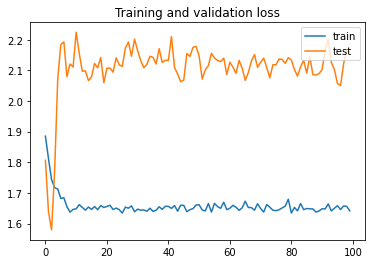

In [ ]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Above one is overfit model, it can be identified from the learning curve of the training and validation loss only.

Text(0.5, 1.0, 'Training and validation accuracy')

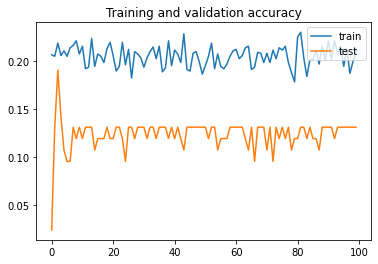

In [ ]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['categorical_accuracy'], label = 'train')
plt.plot(epochs, training_history.history['val_categorical_accuracy'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
model.save("finalized_keras_model.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


# RNN or LSTM classifiers

Architecture

*   Create a model with Text inputs only.
*   Create a model with Categorical inputs only.
*   Create a model with Multiple inputs.

1. Creating a Model with Text Inputs Only
In this section, we will create a classification model that uses accident description column alone.

In [ ]:
# Select input and output features
X_text = Safety_df['Cleaned_Description']
y_text = Safety_df['Accident Level']

In [ ]:
# Encode labels in column 'Accident Level'.
y_text = LabelEncoder().fit_transform(y_text)

In [ ]:
# Divide our data into testing and training sets:
X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(X_text, y_text, test_size = 0.20, random_state = 1, stratify = y_text)

print('X_text_train shape : ({0})'.format(X_text_train.shape[0]))
print('y_text_train shape : ({0},)'.format(y_text_train.shape[0]))
print('X_text_test shape : ({0})'.format(X_text_test.shape[0]))
print('y_text_test shape : ({0},)'.format(y_text_test.shape[0]))

X_text_train shape : (334)
y_text_train shape : (334,)
X_text_test shape : (84)
y_text_test shape : (84,)


In [ ]:
# Convert both the training and test labels into one-hot encoded vectors:
y_text_train = np_utils.to_categorical(y_text_train)
y_text_test = np_utils.to_categorical(y_text_test)

In [ ]:
# The first step in word embeddings is to convert the words into thier corresponding numeric indexes.
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_text_train)

X_text_train = tokenizer.texts_to_sequences(X_text_train)
X_text_test = tokenizer.texts_to_sequences(X_text_test)

In [ ]:
# Sentences can have different lengths, and therefore the sequences returned by the Tokenizer class also consist of variable lengths.
# We need to pad the our sequences using the max length.
vocab_size = len(tokenizer.word_index) + 1
print("vocab_size:", vocab_size)

maxlen = 100

X_text_train = pad_sequences(X_text_train, padding='post', maxlen=maxlen)
X_text_test = pad_sequences(X_text_test, padding='post', maxlen=maxlen)

vocab_size: 3061


In [ ]:
# We need to load the built-in GloVe word embeddings
embedding_size = 200
embeddings_dictionary = dict()

glove_file = open('/content/drive/MyDrive/Colab Notebooks/NEURAL NETWORKS/NLP/Capstone_project/glove.6B.200d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions

glove_file.close()

embedding_matrix = np.zeros((vocab_size, embedding_size))

for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

len(embeddings_dictionary.values())

400000

In [ ]:
reset_random_seeds()

# Build a LSTM Neural Network
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=False)(deep_inputs)

LSTM_Layer_1 = Bidirectional(LSTM(128, return_sequences = True))(embedding_layer)
max_pool_layer_1 = GlobalMaxPool1D()(LSTM_Layer_1)
drop_out_layer_1 = Dropout(0.5, input_shape = (256,))(max_pool_layer_1)
dense_layer_1 = Dense(128, activation = 'relu')(drop_out_layer_1)
drop_out_layer_2 = Dropout(0.5, input_shape = (128,))(dense_layer_1)
dense_layer_2 = Dense(64, activation = 'relu')(drop_out_layer_2)
drop_out_layer_3 = Dropout(0.5, input_shape = (64,))(dense_layer_2)

dense_layer_3 = Dense(32, activation = 'relu')(drop_out_layer_3)
drop_out_layer_4 = Dropout(0.5, input_shape = (32,))(dense_layer_3)

dense_layer_4 = Dense(10, activation = 'relu')(drop_out_layer_4)
drop_out_layer_5 = Dropout(0.5, input_shape = (10,))(dense_layer_4)

dense_layer_5 = Dense(5, activation='softmax')(drop_out_layer_5)
#dense_layer_3 = Dense(5, activation='softmax')(drop_out_layer_3)

# LSTM_Layer_1 = LSTM(128)(embedding_layer)
# dense_layer_1 = Dense(5, activation='softmax')(LSTM_Layer_1)
# model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model = Model(inputs=deep_inputs, outputs=dense_layer_5)
#model = Model(inputs=deep_inputs, outputs=dense_layer_3)

opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
print(model.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 100, 200)          612200    
                                                                 
 bidirectional_2 (Bidirectio  (None, 100, 256)         336896    
 nal)                                                            
                                                                 
 global_max_pooling1d_2 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_18 (Dropout)        (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 128)               3289

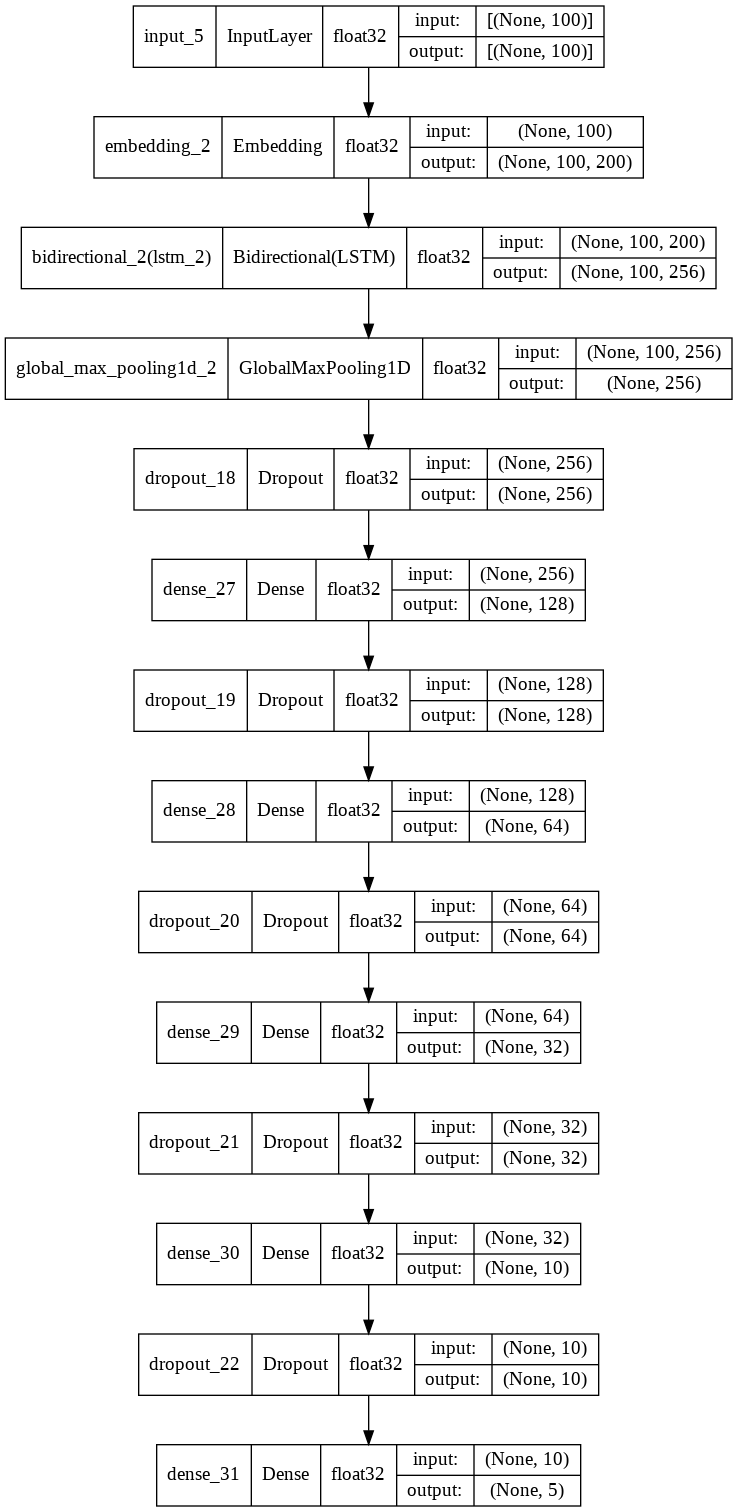

In [ ]:
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_dtype=True, show_layer_names=True)

In [ ]:
# Use earlystopping
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_text_train, y_text_train, target_type))

# fit the keras model on the dataset
training_history = model.fit(X_text_train, y_text_train, epochs=100, batch_size=8, verbose=1, validation_data=(X_text_test, y_text_test), callbacks=[rlrp, metrics])

Epoch 1/100
42/42 [==============================] - 7s 66ms/step - loss: 1.5909 - acc: 0.3263 - val_loss: 1.3998 - val_acc: 0.7381 - lr: 0.0010
Epoch 2/100
13/42 [========>.....................] - ETA: 0s - loss: 1.3203 - acc: 0.6731

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 1s 19ms/step - loss: 1.2710 - acc: 0.6677 - val_loss: 1.1465 - val_acc: 0.7381 - lr: 0.0010
Epoch 3/100
13/42 [========>.....................] - ETA: 0s - loss: 1.2796 - acc: 0.7596

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 1s 19ms/step - loss: 1.2211 - acc: 0.7305 - val_loss: 1.0308 - val_acc: 0.7381 - lr: 0.0010
Epoch 4/100
42/42 [==============================] - 1s 19ms/step - loss: 1.1402 - acc: 0.7216 - val_loss: 0.9990 - val_acc: 0.7381 - lr: 0.0010
Epoch 5/100
42/42 [==============================] - 1s 19ms/step - loss: 1.0466 - acc: 0.7335 - val_loss: 0.9818 - val_acc: 0.7381 - lr: 0.0010
Epoch 6/100
42/42 [==============================] - 1s 19ms/step - loss: 1.0642 - acc: 0.7335 - val_loss: 0.9834 - val_acc: 0.7381 - lr: 0.0010
Epoch 7/100
42/42 [==============================] - 1s 19ms/step - loss: 1.0312 - acc: 0.7365 - val_loss: 0.9721 - val_acc: 0.7381 - lr: 0.0010
Epoch 8/100
42/42 [==============================] - 1s 19ms/step - loss: 0.9978 - acc: 0.7395 - val_loss: 0.9622 - val_acc: 0.7381 - lr: 0.0010
Epoch 9/100
42/42 [==============================] - 1s 19ms/step - loss: 0.9821 - acc: 0.7395 - val_loss: 0.9510 - val_acc: 0.7381 - lr: 0.00

In [ ]:
# evaluate the keras model
_, train_accuracy = model.evaluate(X_text_train, y_text_train, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate(X_text_test, y_text_test, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 73.95
Test accuracy: 73.81


In [ ]:
accuracy, precision, recall, f1 = get_classification_metrics(model, X_text_test, y_text_test, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.738095
Precision: 0.738095
Recall: 0.738095
F1 score: 0.738095


Text(0.5, 1.0, 'Training and validation loss')

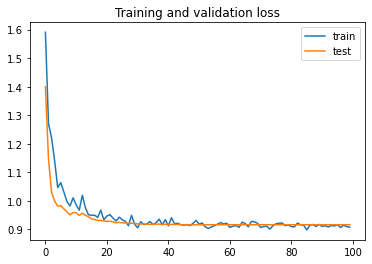

In [ ]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Above one is good fit, it is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values. The loss of the model will almost always be lower on the training dataset than the validation dataset.

Text(0.5, 1.0, 'Training and validation accuracy')

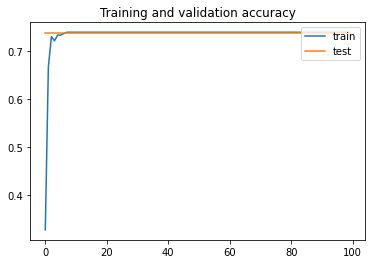

In [ ]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['acc'], label = 'train')
plt.plot(epochs, training_history.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

We could see it accuracy continually rise during training. As expected, we see the learning curves for accuracy on the test dataset plateau, indicating that the model has no longer overfit the training dataset and it is generalized model.

Note: Surprisingly we observe that same f1-score = 73.89 % with accident description alone.

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
model.save("finalized_keras_model_LSTM_1.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


2. Creating a Model with Categorical features Only
In this section, we will create a classification model that uses categorical columns alone. Since the data for these columns is well structured and doesn't contain any sequential or spatial pattern, we can use simple densely connected neural networks to make predictions.

In [ ]:
# Select input and output features
X_cat = ind_featenc_df.drop(['Accident Level','Potential Accident Level'], axis = 1)
y_cat = Safety_df['Accident Level']

In [ ]:
# Encode labels in column 'Accident Level'.
y_cat = LabelEncoder().fit_transform(y_cat)

In [ ]:
# Divide our data into testing and training sets:
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat, y_cat, test_size = 0.20, random_state = 1, stratify = y_cat)

print('X_cat_train shape : ({0})'.format(X_cat_train.shape[0]))
print('y_cat_train shape : ({0},)'.format(y_cat_train.shape[0]))
print('X_cat_test shape : ({0})'.format(X_cat_test.shape[0]))
print('y_cat_test shape : ({0},)'.format(y_cat_test.shape[0]))

X_cat_train shape : (334)
y_cat_train shape : (334,)
X_cat_test shape : (84)
y_cat_test shape : (84,)


In [ ]:
# Convert both the training and test labels into one-hot encoded vectors:
y_cat_train = np_utils.to_categorical(y_cat_train)
y_cat_test = np_utils.to_categorical(y_cat_test)

In [ ]:
# Variable transformation using StandardScaler
scaler_X = StandardScaler()#StandardScaler()
X_cat_train.iloc[:,:6] = scaler_X.fit_transform(X_cat_train.iloc[:,:6]) # Scaling only first 6 feautres

X_cat_test.iloc[:,:6] = scaler_X.fit_transform(X_cat_test.iloc[:,:6]) # Scaling only first 6 feautres

In [ ]:
# fix random seed for reproducibility
reset_random_seeds()

#param = 1e-9
param = 1e-4

input2 = Input(shape=(X_cat_train.shape[1],))
dense_layer_1 = Dense(10, input_dim=X_cat_train.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                kernel_constraint=unit_norm())(input2)
drop_out_layer_1 = Dropout(0.2)(dense_layer_1)
batch_norm_layer_1 = BatchNormalization()(drop_out_layer_1)
dense_layer_2 = Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm())(batch_norm_layer_1)
drop_out_layer_2 = Dropout(0.5)(dense_layer_2)
batch_norm_layer_2 = BatchNormalization()(drop_out_layer_2)
dense_layer_3 = Dense(5, activation='softmax', kernel_regularizer=l2(param), kernel_constraint=unit_norm())(batch_norm_layer_2)

model = Model(inputs=input2, outputs=dense_layer_3)

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
print(model.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 56)]              0         
                                                                 
 dense_32 (Dense)            (None, 10)                570       
                                                                 
 dropout_23 (Dropout)        (None, 10)                0         
                                                                 
 batch_normalization_8 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_33 (Dense)            (None, 10)                110       
                                                                 
 dropout_24 (Dropout)        (None, 10)                0         
                                                           

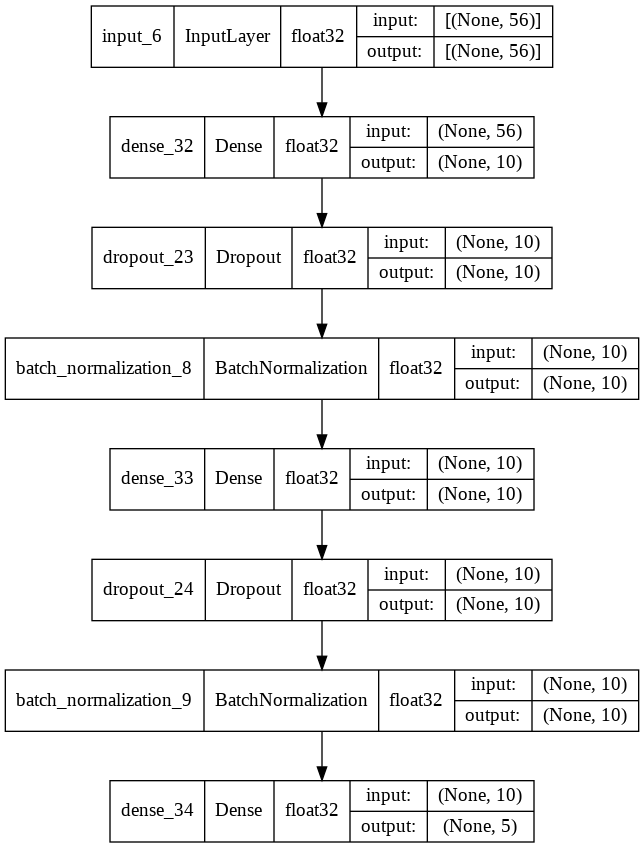

In [ ]:
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_dtype=True, show_layer_names=True)

In [ ]:
# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_cat_train, y_cat_train, target_type))

# fit the keras model on the dataset
training_history = model.fit(X_cat_train, y_cat_train, epochs=100, batch_size=8, verbose=1, validation_data=(X_cat_test, y_cat_test), callbacks=[rlrp, metrics])

Epoch 1/100
42/42 [==============================] - 2s 19ms/step - loss: 1.8874 - acc: 0.1707 - val_loss: 1.3532 - val_acc: 0.6786 - lr: 0.0010
Epoch 2/100
36/42 [========================>.....] - ETA: 0s - loss: 1.6874 - acc: 0.3194

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 0s 9ms/step - loss: 1.6437 - acc: 0.3473 - val_loss: 1.1868 - val_acc: 0.7381 - lr: 0.0010
Epoch 3/100
42/42 [==============================] - 0s 9ms/step - loss: 1.3700 - acc: 0.4671 - val_loss: 1.0936 - val_acc: 0.7381 - lr: 0.0010
Epoch 4/100
42/42 [==============================] - 0s 9ms/step - loss: 1.2256 - acc: 0.5898 - val_loss: 1.0348 - val_acc: 0.7262 - lr: 0.0010
Epoch 5/100
42/42 [==============================] - 0s 9ms/step - loss: 1.1385 - acc: 0.6467 - val_loss: 0.9849 - val_acc: 0.7381 - lr: 0.0010
Epoch 6/100
42/42 [==============================] - 0s 10ms/step - loss: 1.1489 - acc: 0.6647 - val_loss: 0.9581 - val_acc: 0.7381 - lr: 0.0010
Epoch 7/100
42/42 [==============================] - 0s 9ms/step - loss: 1.0995 - acc: 0.6856 - val_loss: 0.9393 - val_acc: 0.7381 - lr: 0.0010
Epoch 8/100
42/42 [==============================] - 0s 9ms/step - loss: 1.0295 - acc: 0.7066 - val_loss: 0.9363 - val_acc: 0.7381 - lr: 0.0010
Epo

In [ ]:
# evaluate the keras model
_, train_accuracy = model.evaluate(X_cat_train, y_cat_train, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate(X_cat_test, y_cat_test, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 73.95
Test accuracy: 73.81


In [ ]:
accuracy, precision, recall, f1 = get_classification_metrics(model, X_cat_test, y_cat_test, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.726190
Precision: 0.734940
Recall: 0.726190
F1 score: 0.730539


Text(0.5, 1.0, 'Training and validation loss')

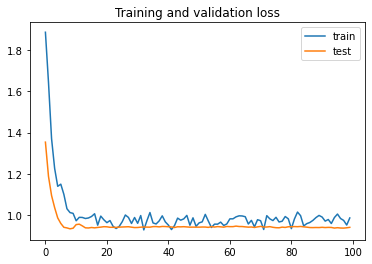

In [ ]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Above one is good fit, it is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values. The loss of the model will almost always be lower on the training dataset than the validation dataset.

Text(0.5, 1.0, 'Training and validation accuracy')

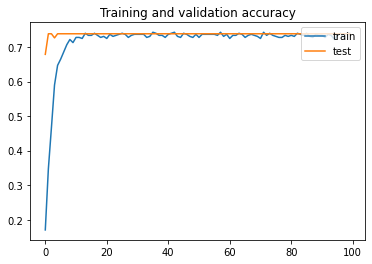

In [ ]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['acc'], label = 'train')
plt.plot(epochs, training_history.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

We could see it accuracy continually rise during training. As expected, we see the learning curves for accuracy on the test dataset plateau, indicating that the model has no longer overfit the training dataset and it is generalized model.

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
model.save("finalized_keras_model_LSTM_2.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


3. Creating a Model with Multiple Inputs

The first submodel will accept textual input in the form of accident description. This submodel will consist of an input shape layer, an embedding layer, and bidirectional LSTM layer of 128 neurons followed by max pool layer, drop out and dense layers. The second submodel will accept input in the form of meta information which consists of dense, batch norm and drop out layers.

The output from the dropout layer of the first submodel and the output from the batch norm layer of the second submodel will be concatenated together and will be used as concatenated input to another dense layer with 10 neurons. Finally, the output dense layer will have five neuorns corresponding to each accident level.

In [ ]:
# fix random seed for reproducibility
reset_random_seeds()

input_1 = Input(shape=(maxlen,))
embedding_layer   = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer_1      = Bidirectional(LSTM(128, return_sequences = True))(embedding_layer)
max_pool_layer_1  = GlobalMaxPool1D()(LSTM_Layer_1)
drop_out_layer_1  = Dropout(0.5, input_shape = (256,))(max_pool_layer_1)
dense_layer_1     = Dense(128, activation = 'relu')(drop_out_layer_1)
drop_out_layer_2  = Dropout(0.5, input_shape = (128,))(dense_layer_1)
dense_layer_2     = Dense(64, activation = 'relu')(drop_out_layer_2)
drop_out_layer_3  = Dropout(0.5, input_shape = (64,))(dense_layer_2)

dense_layer_3     = Dense(32, activation = 'relu')(drop_out_layer_3)
drop_out_layer_4  = Dropout(0.5, input_shape = (32,))(dense_layer_3)
dense_layer_4     = Dense(10, activation = 'relu')(drop_out_layer_4)
drop_out_layer_5 = Dropout(0.5, input_shape = (10,))(dense_layer_4)

#-------------------------------------------------------------------------------
param = 1e-4

input_2 = Input(shape=(X_cat_train.shape[1],))
dense_layer_5       = Dense(10, input_dim=X_cat_train.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                      kernel_constraint=unit_norm())(input_2)
drop_out_layer_6    = Dropout(0.2)(dense_layer_5)
batch_norm_layer_1  = BatchNormalization()(drop_out_layer_6)
dense_layer_6       = Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                            kernel_constraint=unit_norm())(batch_norm_layer_1)
drop_out_layer_7   = Dropout(0.5)(dense_layer_6)
batch_norm_layer_2 = BatchNormalization()(drop_out_layer_7)

concat_layer        = Concatenate()([drop_out_layer_5, batch_norm_layer_2])
dense_layer_7       = Dense(10, activation='relu')(concat_layer)
output  = Dense(5, activation='softmax')(dense_layer_7)
model   = Model(inputs=[input_1, input_2], outputs=output)

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
print(model.summary())

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 100, 200)     612200      ['input_7[0][0]']                
                                                                                                  
 bidirectional_3 (Bidirectional  (None, 100, 256)    336896      ['embedding_3[0][0]']            
 )                                                                                                
                                                                                                  
 global_max_pooling1d_3 (Global  (None, 256)         0           ['bidirectional_3[0][0]']  

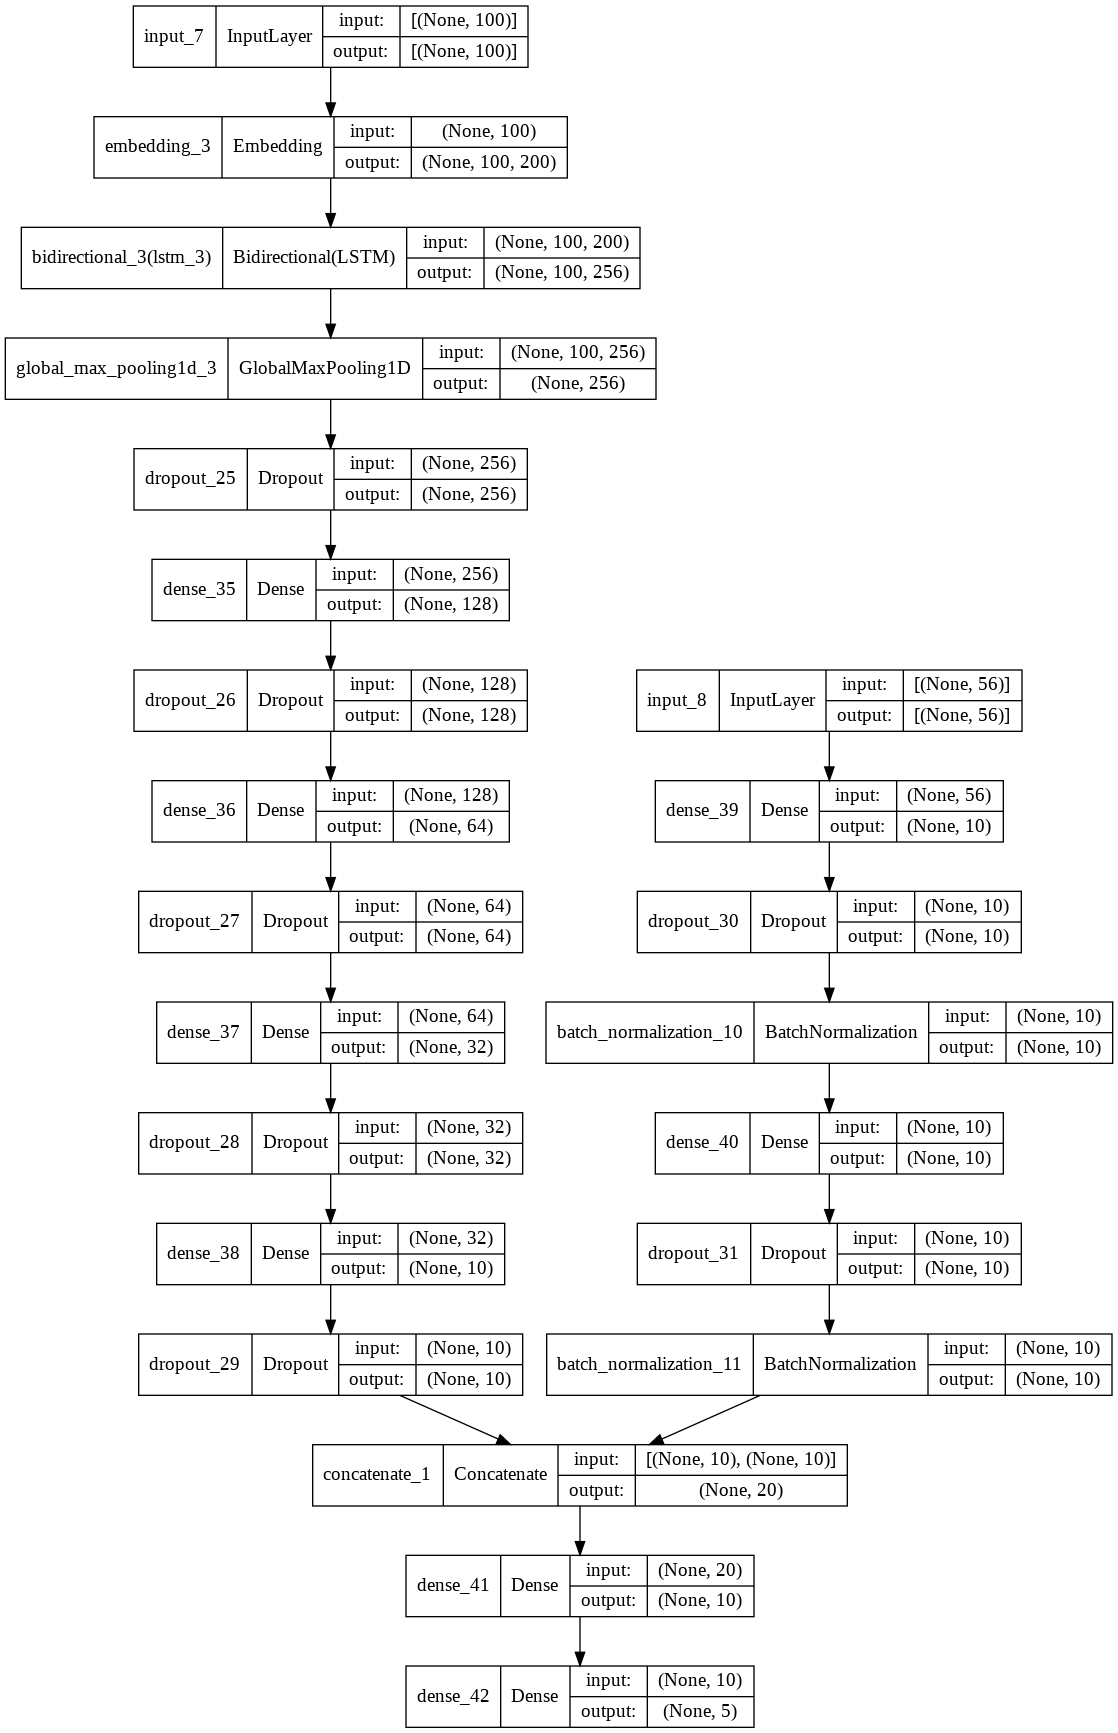

In [ ]:
plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=([X_text_train, X_cat_train], y_cat_train, target_type))

# fit the keras model on the dataset
training_history = model.fit([X_text_train, X_cat_train], y_cat_train, epochs=100, batch_size=8, verbose=1, validation_data=([X_text_test, X_cat_test], y_cat_test), callbacks=[rlrp, metrics])

Epoch 1/100
42/42 [==============================] - 8s 75ms/step - loss: 1.7725 - acc: 0.1617 - val_loss: 1.4471 - val_acc: 0.7381 - lr: 0.0010
Epoch 2/100
 9/42 [=====>........................] - ETA: 0s - loss: 1.3762 - acc: 0.5139

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 1s 23ms/step - loss: 1.3575 - acc: 0.5449 - val_loss: 1.2561 - val_acc: 0.7381 - lr: 0.0010
Epoch 3/100
11/42 [======>.......................] - ETA: 0s - loss: 1.2179 - acc: 0.6591

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 1s 23ms/step - loss: 1.2112 - acc: 0.6826 - val_loss: 1.1208 - val_acc: 0.7381 - lr: 0.0010
Epoch 4/100
42/42 [==============================] - 1s 23ms/step - loss: 1.0829 - acc: 0.7275 - val_loss: 1.0485 - val_acc: 0.7381 - lr: 0.0010
Epoch 5/100
42/42 [==============================] - 1s 24ms/step - loss: 1.0635 - acc: 0.7246 - val_loss: 1.0236 - val_acc: 0.7381 - lr: 0.0010
Epoch 6/100
42/42 [==============================] - 1s 23ms/step - loss: 1.0368 - acc: 0.7335 - val_loss: 1.0110 - val_acc: 0.7381 - lr: 0.0010
Epoch 7/100
42/42 [==============================] - 1s 23ms/step - loss: 1.0500 - acc: 0.7335 - val_loss: 1.0119 - val_acc: 0.7381 - lr: 0.0010
Epoch 8/100
42/42 [==============================] - 1s 23ms/step - loss: 1.0078 - acc: 0.7365 - val_loss: 0.9988 - val_acc: 0.7381 - lr: 0.0010
Epoch 9/100
42/42 [==============================] - 1s 23ms/step - loss: 1.0265 - acc: 0.7395 - val_loss: 0.9948 - val_acc: 0.7381 - lr: 0.00

In [ ]:
# evaluate the keras model
_, train_accuracy = model.evaluate([X_text_train, X_cat_train], y_cat_train, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate([X_text_test, X_cat_test], y_cat_test, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 73.95
Test accuracy: 73.81


In [ ]:
accuracy, precision, recall, f1 = get_classification_metrics(model, [X_text_test, X_cat_test], y_cat_test, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Accuracy: 0.738095
Precision: 0.738095
Recall: 0.738095
F1 score: 0.738095


Text(0.5, 1.0, 'Training and validation loss')

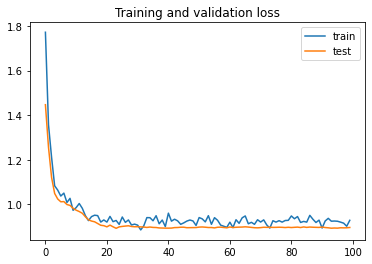

In [ ]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
//plt.title ('Training and validation loss')

Above one is good fit, it is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values. The loss of the model will almost always be lower on the training dataset than the validation dataset.

Text(0.5, 1.0, 'Training and validation accuracy')

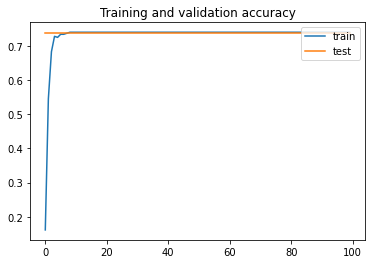

In [ ]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['acc'], label = 'train')
plt.plot(epochs, training_history.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

We could see it accuracy continually rise during training. As expected, we see the learning curves for accuracy on the test dataset plateau, indicating that the model has no longer overfit the training dataset and it is generalized model.

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
model.save("finalized_keras_model_LSTM_3.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


# Conclusion

1.   Able to predict the accident level with a test accuracy of 73.81% and f1-score of 73.81%
2.   We have seven duplicate values in this dataset and dropped those duplicate values
3.   We have no outliers in this dataset.
4.   We have no missing values in this dataset.
5.   Extracted the day, month and year from Date column and created new features such as weekday, weekofyear and seasons.
6.   Target variable – ‘Accident Level’ distribution is not equal (I: 309, II: 40, III: 31, IV: 30, V: 8).
7.   Class imbalance issue is handled using below methods and found out that, for this particular dataset, with original data we have achieved the better results.
    a. Resampling techniques: Oversampling minority class
    b. SMOTE: Generate synthetic samples

8.   By comparing the results from all ML methods with original data, we can select the best method as AdaBoost classifier with f1-score 65.38% with original data.
9. Bootstrap sampling with RandomForestClassifier model with an accuracy of 66.7% - 77.6% is our best model.
10. Bootstrap sampling with AdaBoostClassifier model with an accuracy of 51.7% - 76.8% is our best model.
11. Bootstrap sampling with XGBClassifier model with an accuracy of 63.5% - 74.8% is our best model.
12. Explored below options in Neural Networks.
    *   Convert Classification to Numerical problem: achieved a test accuracy of 53.57% which is a bad result.
    *  Multiclass classification - Target variable - One hot encoded: achieved a test accuracy of 73.81% and f1-score of 73.81% with original data + TF-IDF features from accident description column.
    *   Create a model with Text inputs (accident description alone) only: surprisingly achieved a test accuracy of 73.81% and f1-score of 73.81% with original data.
    *    Create a model with Categorical features only: achieved a test accuracy of 73.81% and f1-score of 72.28% with original data.
    *   Create a model with Multiple Inputs (concatenated the layers from text input model and categorical features input model): surprisingly achieved a test accuracy of 73.81% and f1-score of 73.81% with original data.
13. Finally bidirectional LSTM model can be considered to productionalized the model and predict the accident level.   

















In [ ]:
predict_model = tf.keras.models.load_model('/content/finalized_keras_model.h5')
predict_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 56)]              0         
                                                                 
 dense_16 (Dense)            (None, 10)                570       
                                                                 
 dropout_9 (Dropout)         (None, 10)                0         
                                                                 
 batch_normalization_4 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dropout_10 (Dropout)        (None, 10)                0         
                                                           

In [ ]:
predict_model_1 = tf.keras.models.load_model('/content/finalized_keras_model_LSTM_1.h5')
predict_model_1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 100, 200)          612200    
                                                                 
 bidirectional_2 (Bidirectio  (None, 100, 256)         336896    
 nal)                                                            
                                                                 
 global_max_pooling1d_2 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_18 (Dropout)        (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 128)               3289